In [1]:
import os
import sqlite3
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import dateutil
import pylab as py
import seaborn as sns
import scipy 
from scipy import stats
import sklearn.metrics
from numpy  import array
import glob
import functools
from functools import reduce
import matplotlib.ticker as ticker
from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition, mark_inset)

import statsmodels.api as sm
import MathsUtilities as MUte
import matplotlib.patheffects as path_effects
import GraphHelpers as GH
import matplotlib.lines as mlines

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

C:\Users\jjojeda\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:19: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.


In [2]:
#Open the other apsim output db and putting these in a single dataframe
con1 = sqlite3.connect(r'C:\Users\jjojeda\Google Drive\COALAR\Sorgo\apsimx versions\GEEJan.db')
Harvest1 = pd.read_sql("Select * from HarvestReport", con1)
con2 = sqlite3.connect(r'C:\Users\jjojeda\Google Drive\COALAR\Sorgo\apsimx versions\GEEFeb.db')
Harvest2 = pd.read_sql("Select * from HarvestReport", con2)
con3 = sqlite3.connect(r'C:\Users\jjojeda\Google Drive\COALAR\Sorgo\apsimx versions\GEEMar.db')
Harvest3 = pd.read_sql("Select * from HarvestReport", con3)

In [3]:
#Create the dataframe for Harvest on 1-Jan
df00=Harvest1.drop(['CheckpointID','SimulationID','FolderName','Zone','Sorghum.AboveGround.Wt'],axis=1) 
df0=df00.sort_values(by=['Experiment','S'])

inta=df0.loc[df0['S'] == 'INTA']
ph=df0.loc[df0['S'] == 'GEEpH']
oc=df0.loc[df0['S'] == 'GEEoc']
pawc=df0.loc[df0['S'] == 'GEEpawc']
pawcoc=df0.loc[df0['S'] == 'GEEpawcoc']
pawcpH=df0.loc[df0['S'] == 'GEEpawcpH']
total=df0.loc[df0['S'] == 'GEEall']

df1 = pd.merge(inta, ph, on=['Experiment','Clock.Today','Das'])
df1.rename(columns={'AGBiomass_x':'AGB_INTA','AGBiomass_y':'AGB_GEEpH','Cover_x':'Cover_INTA','Cover_y':'Cover_GEEpH',
                   'RadInt_x':'RadInt_INTA','RadInt_y':'RadInt_GEEpH'}, inplace=True)
df2=df1.drop(['S_x','S_y'],axis=1) 

df3 = pd.merge(oc, pawc, on=['Experiment','Clock.Today','Das'])
df3.rename(columns={'AGBiomass_x':'AGB_GEEoc','AGBiomass_y':'AGB_GEEpawc','Cover_x':'Cover_GEEoc','Cover_y':'Cover_GEEpawc',
                   'RadInt_x':'RadInt_GEEoc','RadInt_y':'RadInt_GEEpawc'}, inplace=True)
df4=df3.drop(['S_x','S_y'],axis=1) 

df5 = pd.merge(df4, total, on=['Experiment','Clock.Today','Das'])
df5.rename(columns={'AGBiomass':'AGB_GEEall','Cover':'Cover_GEEall','RadInt':'RadInt_GEEall'}, inplace=True)
df6=df5.drop(['S'],axis=1) 

df7 = pd.merge(pawcoc, pawcpH, on=['Experiment','Clock.Today','Das'])
df7.rename(columns={'AGBiomass_x':'AGB_GEEpawcoc','AGBiomass_y':'AGB_GEEpawcpH','Cover_x':'Cover_GEEpawcoc','Cover_y':'Cover_GEEpawcpH',
                   'RadInt_x':'RadInt_GEEpawcoc','RadInt_y':'RadInt_GEEpawcpH'}, inplace=True)
df8=df7.drop(['S_x','S_y'],axis=1) 

dfx = pd.merge(df2, df6, on=['Experiment','Clock.Today','Das'])
dfa = pd.merge(dfx, df8, on=['Experiment','Clock.Today','Das'])

dfa['climate'] = dfa['Experiment'].str[:6]
dfa['soil'] = dfa['Experiment'].str[7:11]
dfa['cultivar'] = dfa['Experiment'].str[12:15]
dfa['harvest'] = dfa['Experiment'].str[16:18]
dfa['prevcrop'] = dfa['Experiment'].str[19:20]

In [4]:
#Create the dataframe for Harvest on 1-Feb
df00=Harvest2.drop(['CheckpointID','SimulationID','FolderName','Zone','Sorghum.AboveGround.Wt'],axis=1) 
df0=df00.sort_values(by=['Experiment','S'])

inta=df0.loc[df0['S'] == 'INTA']
ph=df0.loc[df0['S'] == 'GEEpH']
oc=df0.loc[df0['S'] == 'GEEoc']
pawc=df0.loc[df0['S'] == 'GEEpawc']
pawcoc=df0.loc[df0['S'] == 'GEEpawcoc']
pawcpH=df0.loc[df0['S'] == 'GEEpawcpH']
total=df0.loc[df0['S'] == 'GEEall']

df1 = pd.merge(inta, ph, on=['Experiment','Clock.Today','Das'])
df1.rename(columns={'AGBiomass_x':'AGB_INTA','AGBiomass_y':'AGB_GEEpH','Cover_x':'Cover_INTA','Cover_y':'Cover_GEEpH',
                   'RadInt_x':'RadInt_INTA','RadInt_y':'RadInt_GEEpH'}, inplace=True)
df2=df1.drop(['S_x','S_y'],axis=1) 

df3 = pd.merge(oc, pawc, on=['Experiment','Clock.Today','Das'])
df3.rename(columns={'AGBiomass_x':'AGB_GEEoc','AGBiomass_y':'AGB_GEEpawc','Cover_x':'Cover_GEEoc','Cover_y':'Cover_GEEpawc',
                   'RadInt_x':'RadInt_GEEoc','RadInt_y':'RadInt_GEEpawc'}, inplace=True)
df4=df3.drop(['S_x','S_y'],axis=1) 

df5 = pd.merge(df4, total, on=['Experiment','Clock.Today','Das'])
df5.rename(columns={'AGBiomass':'AGB_GEEall','Cover':'Cover_GEEall','RadInt':'RadInt_GEEall'}, inplace=True)
df6=df5.drop(['S'],axis=1) 

df7 = pd.merge(pawcoc, pawcpH, on=['Experiment','Clock.Today','Das'])
df7.rename(columns={'AGBiomass_x':'AGB_GEEpawcoc','AGBiomass_y':'AGB_GEEpawcpH','Cover_x':'Cover_GEEpawcoc','Cover_y':'Cover_GEEpawcpH',
                   'RadInt_x':'RadInt_GEEpawcoc','RadInt_y':'RadInt_GEEpawcpH'}, inplace=True)
df8=df7.drop(['S_x','S_y'],axis=1) 

dfz = pd.merge(df2, df6, on=['Experiment','Clock.Today','Das'])
dfb = pd.merge(dfz, df8, on=['Experiment','Clock.Today','Das'])

dfb['climate'] = dfb['Experiment'].str[:6]
dfb['soil'] = dfb['Experiment'].str[7:11]
dfb['cultivar'] = dfb['Experiment'].str[12:15]
dfb['harvest'] = dfb['Experiment'].str[16:18]
dfb['prevcrop'] = dfb['Experiment'].str[19:20]

In [5]:
#Create the dataframe for Harvest on 1-March
df00=Harvest3.drop(['CheckpointID','SimulationID','FolderName','Zone','Sorghum.AboveGround.Wt'],axis=1) 
df0=df00.sort_values(by=['Experiment','S'])

inta=df0.loc[df0['S'] == 'INTA']
ph=df0.loc[df0['S'] == 'GEEpH']
oc=df0.loc[df0['S'] == 'GEEoc']
pawc=df0.loc[df0['S'] == 'GEEpawc']
pawcoc=df0.loc[df0['S'] == 'GEEpawcoc']
pawcpH=df0.loc[df0['S'] == 'GEEpawcpH']
total=df0.loc[df0['S'] == 'GEEall']

df1 = pd.merge(inta, ph, on=['Experiment','Clock.Today','Das'])
df1.rename(columns={'AGBiomass_x':'AGB_INTA','AGBiomass_y':'AGB_GEEpH','Cover_x':'Cover_INTA','Cover_y':'Cover_GEEpH',
                   'RadInt_x':'RadInt_INTA','RadInt_y':'RadInt_GEEpH'}, inplace=True)
df2=df1.drop(['S_x','S_y'],axis=1) 

df3 = pd.merge(oc, pawc, on=['Experiment','Clock.Today','Das'])
df3.rename(columns={'AGBiomass_x':'AGB_GEEoc','AGBiomass_y':'AGB_GEEpawc','Cover_x':'Cover_GEEoc','Cover_y':'Cover_GEEpawc',
                   'RadInt_x':'RadInt_GEEoc','RadInt_y':'RadInt_GEEpawc'}, inplace=True)
df4=df3.drop(['S_x','S_y'],axis=1) 

df5 = pd.merge(df4, total, on=['Experiment','Clock.Today','Das'])
df5.rename(columns={'AGBiomass':'AGB_GEEall','Cover':'Cover_GEEall','RadInt':'RadInt_GEEall'}, inplace=True)
df6=df5.drop(['S'],axis=1) 

df7 = pd.merge(pawcoc, pawcpH, on=['Experiment','Clock.Today','Das'])
df7.rename(columns={'AGBiomass_x':'AGB_GEEpawcoc','AGBiomass_y':'AGB_GEEpawcpH','Cover_x':'Cover_GEEpawcoc','Cover_y':'Cover_GEEpawcpH',
                   'RadInt_x':'RadInt_GEEpawcoc','RadInt_y':'RadInt_GEEpawcpH'}, inplace=True)
df8=df7.drop(['S_x','S_y'],axis=1) 

dfy = pd.merge(df2, df6, on=['Experiment','Clock.Today','Das'])
dfc = pd.merge(dfy, df8, on=['Experiment','Clock.Today','Das'])

dfc['climate'] = dfc['Experiment'].str[:6]
dfc['soil'] = dfc['Experiment'].str[7:11]
dfc['cultivar'] = dfc['Experiment'].str[12:15]
dfc['harvest'] = dfc['Experiment'].str[16:18]
dfc['prevcrop'] = dfc['Experiment'].str[19:20]

In [6]:
#Create categorical variables for differend DAS values
df_final=pd.concat([dfa, dfb, dfc])
df_final['DAS'] = ((df_final.Das > 75) | (df_final.Das > 75)).map({True:'75-120', False:'30-75'})

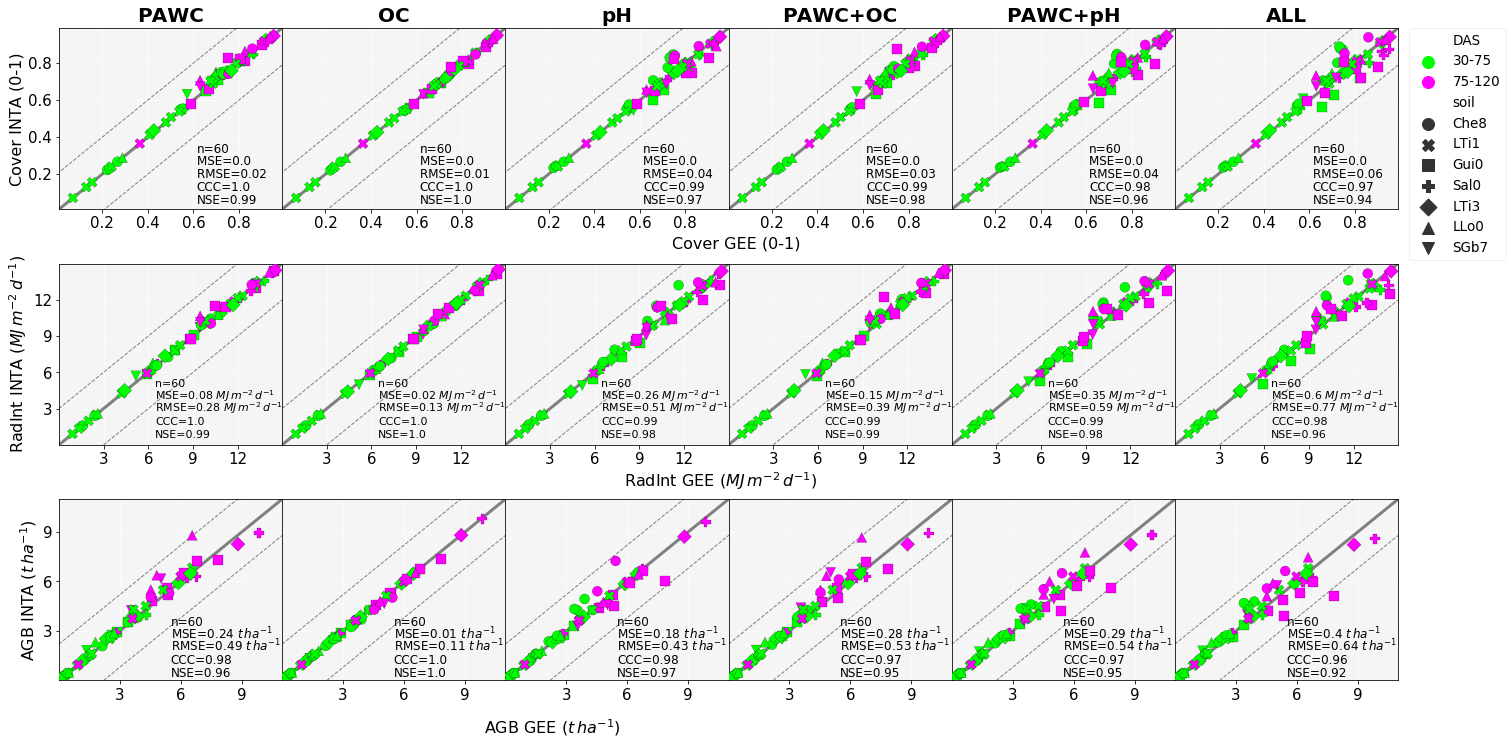

In [7]:
kwargs  =   {'edgecolor':"k"}
fig = plt.figure(figsize=(24,12))

ax=plt.subplot(3, 6, 1)
ax.set_title('PAWC',fontsize= 20,weight='bold') 
xmax=0.99
ymax=0.99
plt.plot([0,xmax],[0,ymax],"-",color="grey", linewidth=3,zorder=1)
plt.plot([0,xmax],[0.2,ymax+0.2],"--",color="grey", linewidth=1,zorder=1)
plt.plot([0.2,xmax+0.2],[0,ymax],"--",color="grey", linewidth=1,zorder=1)
sns.scatterplot(x="Cover_INTA", y="Cover_GEEpawc",hue='DAS', style='soil', alpha=1,data=df_final,linewidth=0.2,**kwargs,s=100,zorder=3, palette = ['lime','magenta'])

# Formatting graph and background
plt.legend(prop=dict(size=13.5),bbox_to_anchor=(4.05, 1), loc=2, borderaxespad=0., ncol=1,framealpha=0.3,markerscale=2)
plt.ylabel('Cover INTA (0-1)', fontsize =16)
plt.xlabel('', fontsize =16)
ax = plt.gca()
ax.grid(True, 'major', color='w', linestyle='-', linewidth=0.5)
ax.grid(True, 'minor', color='0.92', linestyle='-', linewidth=0.7)
ax.patch.set_facecolor('0.96')
ax.set_axisbelow(True)
ax.yaxis.set_tick_params(labelsize=15)
ax.xaxis.set_tick_params(labelsize=15)
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.2))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.2))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.set_xlim([0.01,xmax])
ax.set_ylim([0.01,ymax])
plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)
plt.tick_params(axis='y',which='both',left=True)
ax.get_legend().remove()

#Taking data from dataframe to a list
Obs = pd.Series(df_final.Cover_INTA.values)
y_o= Obs.tolist()
Pre = pd.Series(df_final.Cover_GEEpawc.values)
y_p= Pre.tolist()

#Converting from a list to an arange
y_obs = array(y_o).round(decimals=2)
y_pre = array(y_p).round(decimals=2)

def rmse(y_obs, y_pre):
    """ Compute RMSE between two time series """
    return np.sqrt(np.mean(np.square(y_pre - y_obs))).round(decimals=2)

def mse(y_true, y_pre):
    """ Compute MSE between two time series """
    return np.mean(np.square(y_pre - y_true)).round(decimals=2)

def ccc(y_true, y_pre):
    """ Compute the concordance correlation coefficient (CCC) between two
    1D time series """
    if y_true.ndim == 1:
        y_true = y_true.reshape(1, -1)
    if y_pre.ndim == 1:
        y_pre = y_pre.reshape(1, -1)
    cov_xy = np.mean(y_pre*y_true, axis=1) - \
        (np.mean(y_pre, axis=1) * np.mean(y_true, axis=1))
    mean_x = np.mean(y_pre, axis=1)
    mean_y = np.mean(y_true, axis=1)
    var_x = np.var(y_pre, axis=1)
    var_y = np.var(y_true, axis=1)
    return (2*cov_xy/(var_x + var_y + np.square(mean_x - mean_y)))[0].round(decimals=2)

#Get the values
N=str(Obs.count())

MSEb=mse(y_obs, y_pre)
MSE=str(MSEb)

RMSEb=rmse(y_obs, y_pre)
RMSE=str(RMSEb)

SumOfSquaredResiduals=((np.square(y_pre - y_obs))).sum()
SumOfSquaredSD=(np.square(y_obs-(np.mean(y_obs)))).sum()
NSEb = (1 - SumOfSquaredResiduals / SumOfSquaredSD).round(decimals=2)
NSE=str(NSEb)

CCCb=ccc(y_obs, y_pre)
CCC=str(CCCb)

#Plot statistical values
#plt.text(xmax*0.05, ymax*0.9,'(a)',fontsize=22,color='k',weight='bold')
plt.text(xmax*0.62, ymax*0.32,'n='+N,fontsize=12,color='k')
plt.text(xmax*0.62, ymax*0.25,'MSE='+MSE+' ',fontsize=12,color='k')
plt.text(xmax*0.62, ymax*0.18,'RMSE='+RMSE+' ',fontsize=12,color='k')
plt.text(xmax*0.62, ymax*0.11,'CCC='+CCC,fontsize=12,color='k')
plt.text(xmax*0.62, ymax*0.04,'NSE='+NSE,fontsize=12,color='k')

####################################################################################
ax=plt.subplot(3, 6, 2)
ax.set_title('OC',fontsize= 20,weight='bold') 
xmax=0.99
ymax=0.99
plt.plot([0,xmax],[0,ymax],"-",color="grey", linewidth=3,zorder=1)
plt.plot([0,xmax],[0.2,ymax+0.2],"--",color="grey", linewidth=1,zorder=1)
plt.plot([0.2,xmax+0.2],[0,ymax],"--",color="grey", linewidth=1,zorder=1)
sns.scatterplot(x="Cover_INTA", y="Cover_GEEoc",hue='DAS', style='soil', alpha=1,data=df_final,linewidth=0.2,**kwargs,s=100,zorder=3, palette = ['lime','magenta'])

# Formatting graph and background
plt.legend(prop=dict(size=13.5),bbox_to_anchor=(3.5, 1), loc=2, borderaxespad=0., ncol=1,framealpha=0.3,markerscale=2)
plt.ylabel('', fontsize =18)
plt.xlabel('', fontsize =16)
ax = plt.gca()
ax.grid(True, 'major', color='w', linestyle='-', linewidth=0.5)
ax.grid(True, 'minor', color='0.92', linestyle='-', linewidth=0.7)
ax.patch.set_facecolor('0.96')
ax.set_axisbelow(True)
ax.yaxis.set_tick_params(labelsize=15)
ax.xaxis.set_tick_params(labelsize=15)
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.2))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.2))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.set_xlim([0.01,xmax])
ax.set_ylim([0.01,ymax])
plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)
plt.tick_params(axis='y',which='both',left=False)
ax.set_yticklabels([])
ax.get_legend().remove()

#Taking data from dataframe to a list
Obs = pd.Series(df_final.Cover_INTA.values)
y_o= Obs.tolist()
Pre = pd.Series(df_final.Cover_GEEoc.values)
y_p= Pre.tolist()

#Converting from a list to an arange
y_obs = array(y_o).round(decimals=2)
y_pre = array(y_p).round(decimals=2)

def rmse(y_obs, y_pre):
    """ Compute RMSE between two time series """
    return np.sqrt(np.mean(np.square(y_pre - y_obs))).round(decimals=2)

def mse(y_true, y_pre):
    """ Compute MSE between two time series """
    return np.mean(np.square(y_pre - y_true)).round(decimals=2)

def ccc(y_true, y_pre):
    """ Compute the concordance correlation coefficient (CCC) between two
    1D time series """
    if y_true.ndim == 1:
        y_true = y_true.reshape(1, -1)
    if y_pre.ndim == 1:
        y_pre = y_pre.reshape(1, -1)
    cov_xy = np.mean(y_pre*y_true, axis=1) - \
        (np.mean(y_pre, axis=1) * np.mean(y_true, axis=1))
    mean_x = np.mean(y_pre, axis=1)
    mean_y = np.mean(y_true, axis=1)
    var_x = np.var(y_pre, axis=1)
    var_y = np.var(y_true, axis=1)
    return (2*cov_xy/(var_x + var_y + np.square(mean_x - mean_y)))[0].round(decimals=2)

#Get the values
N=str(Obs.count())

MSEb=mse(y_obs, y_pre)
MSE=str(MSEb)

RMSEb=rmse(y_obs, y_pre)
RMSE=str(RMSEb)

SumOfSquaredResiduals=((np.square(y_pre - y_obs))).sum()
SumOfSquaredSD=(np.square(y_obs-(np.mean(y_obs)))).sum()
NSEb = (1 - SumOfSquaredResiduals / SumOfSquaredSD).round(decimals=2)
NSE=str(NSEb)

CCCb=ccc(y_obs, y_pre)
CCC=str(CCCb)

#Plot statistical values
#plt.text(xmax*0.05, ymax*0.9,'(b)',fontsize=22,color='k',weight='bold')
plt.text(xmax*0.62, ymax*0.32,'n='+N,fontsize=12,color='k')
plt.text(xmax*0.62, ymax*0.25,'MSE='+MSE+' ',fontsize=12,color='k')
plt.text(xmax*0.62, ymax*0.18,'RMSE='+RMSE+' ',fontsize=12,color='k')
plt.text(xmax*0.62, ymax*0.11,'CCC='+CCC,fontsize=12,color='k')
plt.text(xmax*0.62, ymax*0.04,'NSE='+NSE,fontsize=12,color='k')

#################################################################################
ax=plt.subplot(3, 6, 3)
ax.set_title('pH',fontsize= 20,weight='bold') 
xmax=0.99
ymax=0.99
plt.plot([0,xmax],[0,ymax],"-",color="grey", linewidth=3,zorder=1)
plt.plot([0,xmax],[0.2,ymax+0.2],"--",color="grey", linewidth=1,zorder=1)
plt.plot([0.2,xmax+0.2],[0,ymax],"--",color="grey", linewidth=1,zorder=1)
sns.scatterplot(x="Cover_INTA", y="Cover_GEEpH",hue='DAS', style='soil', alpha=1,data=df_final,linewidth=0.2,**kwargs,s=100,zorder=3, palette = ['lime','magenta'])

# Formatting graph and background
plt.legend(prop=dict(size=13.5),bbox_to_anchor=(1.1, 1), loc=2, borderaxespad=0., ncol=1,framealpha=0.3,markerscale=2)
plt.ylabel('', fontsize =18)
plt.xlabel('', fontsize =16)
ax = plt.gca()
ax.grid(True, 'major', color='w', linestyle='-', linewidth=0.5)
ax.grid(True, 'minor', color='0.92', linestyle='-', linewidth=0.7)
ax.patch.set_facecolor('0.96')
ax.set_axisbelow(True)
ax.yaxis.set_tick_params(labelsize=15)
ax.xaxis.set_tick_params(labelsize=15)
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.2))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.2))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.set_xlim([0.01,xmax])
ax.set_ylim([0.01,ymax])
plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)
plt.tick_params(axis='y',which='both',left=False)
ax.set_yticklabels([])
ax.get_legend().remove()

#Taking data from dataframe to a list
Obs = pd.Series(df_final.Cover_INTA.values)
y_o= Obs.tolist()
Pre = pd.Series(df_final.Cover_GEEpH.values)
y_p= Pre.tolist()

#Converting from a list to an arange
y_obs = array(y_o).round(decimals=2)
y_pre = array(y_p).round(decimals=2)

def rmse(y_obs, y_pre):
    """ Compute RMSE between two time series """
    return np.sqrt(np.mean(np.square(y_pre - y_obs))).round(decimals=2)

def mse(y_true, y_pre):
    """ Compute MSE between two time series """
    return np.mean(np.square(y_pre - y_true)).round(decimals=2)

def ccc(y_true, y_pre):
    """ Compute the concordance correlation coefficient (CCC) between two
    1D time series """
    if y_true.ndim == 1:
        y_true = y_true.reshape(1, -1)
    if y_pre.ndim == 1:
        y_pre = y_pre.reshape(1, -1)
    cov_xy = np.mean(y_pre*y_true, axis=1) - \
        (np.mean(y_pre, axis=1) * np.mean(y_true, axis=1))
    mean_x = np.mean(y_pre, axis=1)
    mean_y = np.mean(y_true, axis=1)
    var_x = np.var(y_pre, axis=1)
    var_y = np.var(y_true, axis=1)
    return (2*cov_xy/(var_x + var_y + np.square(mean_x - mean_y)))[0].round(decimals=2)

#Get the values
N=str(Obs.count())

MSEb=mse(y_obs, y_pre)
MSE=str(MSEb)

RMSEb=rmse(y_obs, y_pre)
RMSE=str(RMSEb)

SumOfSquaredResiduals=((np.square(y_pre - y_obs))).sum()
SumOfSquaredSD=(np.square(y_obs-(np.mean(y_obs)))).sum()
NSEb = (1 - SumOfSquaredResiduals / SumOfSquaredSD).round(decimals=2)
NSE=str(NSEb)

CCCb=ccc(y_obs, y_pre)
CCC=str(CCCb)

#Plot statistical values
#plt.text(xmax*0.05, ymax*0.9,'(c)',fontsize=22,color='k',weight='bold')
plt.text(xmax*0.62, ymax*0.32,'n='+N,fontsize=12,color='k')
plt.text(xmax*0.62, ymax*0.25,'MSE='+MSE+' ',fontsize=12,color='k')
plt.text(xmax*0.62, ymax*0.18,'RMSE='+RMSE+' ',fontsize=12,color='k')
plt.text(xmax*0.62, ymax*0.11,'CCC='+CCC,fontsize=12,color='k')
plt.text(xmax*0.62, ymax*0.04,'NSE='+NSE,fontsize=12,color='k')

################################################################################

ax=plt.subplot(3, 6, 4)
ax.set_title('PAWC+OC',fontsize= 20,weight='bold') 
xmax=0.99
ymax=0.99
plt.plot([0,xmax],[0,ymax],"-",color="grey", linewidth=3,zorder=1)
plt.plot([0,xmax],[0.2,ymax+0.2],"--",color="grey", linewidth=1,zorder=1)
plt.plot([0.2,xmax+0.2],[0,ymax],"--",color="grey", linewidth=1,zorder=1)
sns.scatterplot(x="Cover_INTA", y="Cover_GEEpawcoc",hue='DAS', style='soil', alpha=1,data=df_final,linewidth=0.2,**kwargs,s=100,zorder=3, palette = ['lime','magenta'])

# Formatting graph and background
plt.legend(prop=dict(size=13.5),bbox_to_anchor=(4.05, 1), loc=2, borderaxespad=0., ncol=1,framealpha=0.3,markerscale=2)
plt.ylabel('', fontsize =16)
plt.xlabel('', fontsize =16)
ax = plt.gca()
ax.grid(True, 'major', color='w', linestyle='-', linewidth=0.5)
ax.grid(True, 'minor', color='0.92', linestyle='-', linewidth=0.7)
ax.patch.set_facecolor('0.96')
ax.set_axisbelow(True)
ax.yaxis.set_tick_params(labelsize=15)
ax.xaxis.set_tick_params(labelsize=15)
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.2))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.2))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.set_xlim([0.01,xmax])
ax.set_ylim([0.01,ymax])
plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)
plt.tick_params(axis='y',which='both',left=False)
ax.get_legend().remove()
ax.set_yticklabels([])

#Taking data from dataframe to a list
Obs = pd.Series(df_final.Cover_INTA.values)
y_o= Obs.tolist()
Pre = pd.Series(df_final.Cover_GEEpawcoc.values)
y_p= Pre.tolist()

#Converting from a list to an arange
y_obs = array(y_o).round(decimals=2)
y_pre = array(y_p).round(decimals=2)

def rmse(y_obs, y_pre):
    """ Compute RMSE between two time series """
    return np.sqrt(np.mean(np.square(y_pre - y_obs))).round(decimals=2)

def mse(y_true, y_pre):
    """ Compute MSE between two time series """
    return np.mean(np.square(y_pre - y_true)).round(decimals=2)

def ccc(y_true, y_pre):
    """ Compute the concordance correlation coefficient (CCC) between two
    1D time series """
    if y_true.ndim == 1:
        y_true = y_true.reshape(1, -1)
    if y_pre.ndim == 1:
        y_pre = y_pre.reshape(1, -1)
    cov_xy = np.mean(y_pre*y_true, axis=1) - \
        (np.mean(y_pre, axis=1) * np.mean(y_true, axis=1))
    mean_x = np.mean(y_pre, axis=1)
    mean_y = np.mean(y_true, axis=1)
    var_x = np.var(y_pre, axis=1)
    var_y = np.var(y_true, axis=1)
    return (2*cov_xy/(var_x + var_y + np.square(mean_x - mean_y)))[0].round(decimals=2)

#Get the values
N=str(Obs.count())

MSEb=mse(y_obs, y_pre)
MSE=str(MSEb)

RMSEb=rmse(y_obs, y_pre)
RMSE=str(RMSEb)

SumOfSquaredResiduals=((np.square(y_pre - y_obs))).sum()
SumOfSquaredSD=(np.square(y_obs-(np.mean(y_obs)))).sum()
NSEb = (1 - SumOfSquaredResiduals / SumOfSquaredSD).round(decimals=2)
NSE=str(NSEb)

CCCb=ccc(y_obs, y_pre)
CCC=str(CCCb)

#Plot statistical values
#plt.text(xmax*0.05, ymax*0.9,'(d)',fontsize=22,color='k',weight='bold')
plt.text(xmax*0.62, ymax*0.32,'n='+N,fontsize=12,color='k')
plt.text(xmax*0.62, ymax*0.25,'MSE='+MSE+' ',fontsize=12,color='k')
plt.text(xmax*0.62, ymax*0.18,'RMSE='+RMSE+' ',fontsize=12,color='k')
plt.text(xmax*0.62, ymax*0.11,'CCC='+CCC,fontsize=12,color='k')
plt.text(xmax*0.62, ymax*0.04,'NSE='+NSE,fontsize=12,color='k')

####################################################################################
ax=plt.subplot(3, 6, 5)
ax.set_title('PAWC+pH',fontsize= 20,weight='bold') 
xmax=0.99
ymax=0.99
plt.plot([0,xmax],[0,ymax],"-",color="grey", linewidth=3,zorder=1)
plt.plot([0,xmax],[0.2,ymax+0.2],"--",color="grey", linewidth=1,zorder=1)
plt.plot([0.2,xmax+0.2],[0,ymax],"--",color="grey", linewidth=1,zorder=1)
sns.scatterplot(x="Cover_INTA", y="Cover_GEEpawcpH",hue='DAS', style='soil', alpha=1,data=df_final,linewidth=0.2,**kwargs,s=100,zorder=3, palette = ['lime','magenta'])

# Formatting graph and background
plt.legend(prop=dict(size=13.5),bbox_to_anchor=(3.5, 1), loc=2, borderaxespad=0., ncol=1,framealpha=0.3,markerscale=2)
plt.ylabel('', fontsize =18)
plt.xlabel('', fontsize =16)
ax = plt.gca()
ax.grid(True, 'major', color='w', linestyle='-', linewidth=0.5)
ax.grid(True, 'minor', color='0.92', linestyle='-', linewidth=0.7)
ax.patch.set_facecolor('0.96')
ax.set_axisbelow(True)
ax.yaxis.set_tick_params(labelsize=15)
ax.xaxis.set_tick_params(labelsize=15)
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.2))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.2))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.set_xlim([0.01,xmax])
ax.set_ylim([0.01,ymax])
plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)
plt.tick_params(axis='y',which='both',left=False)
ax.set_yticklabels([])
ax.get_legend().remove()

#Taking data from dataframe to a list
Obs = pd.Series(df_final.Cover_INTA.values)
y_o= Obs.tolist()
Pre = pd.Series(df_final.Cover_GEEpawcpH.values)
y_p= Pre.tolist()

#Converting from a list to an arange
y_obs = array(y_o).round(decimals=2)
y_pre = array(y_p).round(decimals=2)

def rmse(y_obs, y_pre):
    """ Compute RMSE between two time series """
    return np.sqrt(np.mean(np.square(y_pre - y_obs))).round(decimals=2)

def mse(y_true, y_pre):
    """ Compute MSE between two time series """
    return np.mean(np.square(y_pre - y_true)).round(decimals=2)

def ccc(y_true, y_pre):
    """ Compute the concordance correlation coefficient (CCC) between two
    1D time series """
    if y_true.ndim == 1:
        y_true = y_true.reshape(1, -1)
    if y_pre.ndim == 1:
        y_pre = y_pre.reshape(1, -1)
    cov_xy = np.mean(y_pre*y_true, axis=1) - \
        (np.mean(y_pre, axis=1) * np.mean(y_true, axis=1))
    mean_x = np.mean(y_pre, axis=1)
    mean_y = np.mean(y_true, axis=1)
    var_x = np.var(y_pre, axis=1)
    var_y = np.var(y_true, axis=1)
    return (2*cov_xy/(var_x + var_y + np.square(mean_x - mean_y)))[0].round(decimals=2)

#Get the values
N=str(Obs.count())

MSEb=mse(y_obs, y_pre)
MSE=str(MSEb)

RMSEb=rmse(y_obs, y_pre)
RMSE=str(RMSEb)

SumOfSquaredResiduals=((np.square(y_pre - y_obs))).sum()
SumOfSquaredSD=(np.square(y_obs-(np.mean(y_obs)))).sum()
NSEb = (1 - SumOfSquaredResiduals / SumOfSquaredSD).round(decimals=2)
NSE=str(NSEb)

CCCb=ccc(y_obs, y_pre)
CCC=str(CCCb)

#Plot statistical values
#plt.text(xmax*0.05, ymax*0.9,'(e)',fontsize=22,color='k',weight='bold')
plt.text(xmax*0.62, ymax*0.32,'n='+N,fontsize=12,color='k')
plt.text(xmax*0.62, ymax*0.25,'MSE='+MSE+' ',fontsize=12,color='k')
plt.text(xmax*0.62, ymax*0.18,'RMSE='+RMSE+' ',fontsize=12,color='k')
plt.text(xmax*0.62, ymax*0.11,'CCC='+CCC,fontsize=12,color='k')
plt.text(xmax*0.62, ymax*0.04,'NSE='+NSE,fontsize=12,color='k')

##############################################################################
ax=plt.subplot(3, 6, 6)
ax.set_title('ALL',fontsize= 20,weight='bold') 
xmax=0.99
ymax=0.99
plt.plot([0,xmax],[0,ymax],"-",color="grey", linewidth=3,zorder=1)
plt.plot([0,xmax],[0.2,ymax+0.2],"--",color="grey", linewidth=1,zorder=1)
plt.plot([0.2,xmax+0.2],[0,ymax],"--",color="grey", linewidth=1,zorder=1)
sns.scatterplot(x="Cover_INTA", y="Cover_GEEall",hue='DAS', style='soil', alpha=1,data=df_final,linewidth=0.2,**kwargs,s=100,zorder=3, palette = ['lime','magenta'])

# Formatting graph and background
plt.legend(prop=dict(size=13.5),bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=1,framealpha=0.3,markerscale=2)
plt.ylabel('', fontsize =18)
plt.xlabel('', fontsize =16)
ax = plt.gca()
ax.grid(True, 'major', color='w', linestyle='-', linewidth=0.5)
ax.grid(True, 'minor', color='0.92', linestyle='-', linewidth=0.7)
ax.patch.set_facecolor('0.96')
ax.set_axisbelow(True)
ax.yaxis.set_tick_params(labelsize=15)
ax.xaxis.set_tick_params(labelsize=15)
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.2))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.2))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.set_xlim([0.01,xmax])
ax.set_ylim([0.01,ymax])
plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)
plt.tick_params(axis='y',which='both',left=False)
ax.set_yticklabels([])
#ax.get_legend().remove()

#Taking data from dataframe to a list
Obs = pd.Series(df_final.Cover_INTA.values)
y_o= Obs.tolist()
Pre = pd.Series(df_final.Cover_GEEall.values)
y_p= Pre.tolist()

#Converting from a list to an arange
y_obs = array(y_o).round(decimals=2)
y_pre = array(y_p).round(decimals=2)

def rmse(y_obs, y_pre):
    """ Compute RMSE between two time series """
    return np.sqrt(np.mean(np.square(y_pre - y_obs))).round(decimals=2)

def mse(y_true, y_pre):
    """ Compute MSE between two time series """
    return np.mean(np.square(y_pre - y_true)).round(decimals=2)

def ccc(y_true, y_pre):
    """ Compute the concordance correlation coefficient (CCC) between two
    1D time series """
    if y_true.ndim == 1:
        y_true = y_true.reshape(1, -1)
    if y_pre.ndim == 1:
        y_pre = y_pre.reshape(1, -1)
    cov_xy = np.mean(y_pre*y_true, axis=1) - \
        (np.mean(y_pre, axis=1) * np.mean(y_true, axis=1))
    mean_x = np.mean(y_pre, axis=1)
    mean_y = np.mean(y_true, axis=1)
    var_x = np.var(y_pre, axis=1)
    var_y = np.var(y_true, axis=1)
    return (2*cov_xy/(var_x + var_y + np.square(mean_x - mean_y)))[0].round(decimals=2)

#Get the values
N=str(Obs.count())

MSEb=mse(y_obs, y_pre)
MSE=str(MSEb)

RMSEb=rmse(y_obs, y_pre)
RMSE=str(RMSEb)

SumOfSquaredResiduals=((np.square(y_pre - y_obs))).sum()
SumOfSquaredSD=(np.square(y_obs-(np.mean(y_obs)))).sum()
NSEb = (1 - SumOfSquaredResiduals / SumOfSquaredSD).round(decimals=2)
NSE=str(NSEb)

CCCb=ccc(y_obs, y_pre)
CCC=str(CCCb)

#Plot statistical values
#plt.text(xmax*0.05, ymax*0.9,'(f)',fontsize=22,color='k',weight='bold')
plt.text(xmax*0.62, ymax*0.32,'n='+N,fontsize=12,color='k')
plt.text(xmax*0.62, ymax*0.25,'MSE='+MSE+' ',fontsize=12,color='k')
plt.text(xmax*0.62, ymax*0.18,'RMSE='+RMSE+' ',fontsize=12,color='k')
plt.text(xmax*0.62, ymax*0.11,'CCC='+CCC,fontsize=12,color='k')
plt.text(xmax*0.62, ymax*0.04,'NSE='+NSE,fontsize=12,color='k')

####################################################################
plt.text(-2.2, -0.2,'Cover GEE (0-1)',fontsize=16,color='k')
#####################################################################

ax=plt.subplot(3, 6, 7)
#ax.set_title('PAWC',fontsize= 20,weight='bold') 
xmax=14.99
ymax=14.99
plt.plot([0,xmax],[0,ymax],"-",color="grey", linewidth=3,zorder=1)
plt.plot([0,xmax],[3,ymax+3],"--",color="grey", linewidth=1,zorder=1)
plt.plot([3,xmax+3],[0,ymax],"--",color="grey", linewidth=1,zorder=1)
sns.scatterplot(x="RadInt_INTA", y="RadInt_GEEpawc",hue='DAS', style='soil', alpha=1,data=df_final,linewidth=0.2,**kwargs,s=100,zorder=3, palette = ['lime','magenta'])

# Formatting graph and background
plt.legend(prop=dict(size=13.5),bbox_to_anchor=(4.05, 1), loc=2, borderaxespad=0., ncol=1,framealpha=0.3,markerscale=2)
plt.ylabel('RadInt INTA ($MJ\,m^{-2}\,d^{-1}$)', fontsize =16)
plt.xlabel('', fontsize =16)
ax = plt.gca()
ax.grid(True, 'major', color='w', linestyle='-', linewidth=0.5)
ax.grid(True, 'minor', color='0.92', linestyle='-', linewidth=0.7)
ax.patch.set_facecolor('0.96')
ax.set_axisbelow(True)
ax.yaxis.set_tick_params(labelsize=15)
ax.xaxis.set_tick_params(labelsize=15)
ax.xaxis.set_major_locator(ticker.MultipleLocator(3))
ax.yaxis.set_major_locator(ticker.MultipleLocator(3))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.set_xlim([0.01,xmax])
ax.set_ylim([0.01,ymax])
plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)
plt.tick_params(axis='y',which='both',left=True)
ax.get_legend().remove()

#Taking data from dataframe to a list
Obs = pd.Series(df_final.RadInt_INTA.values)
y_o= Obs.tolist()
Pre = pd.Series(df_final.RadInt_GEEpawc.values)
y_p= Pre.tolist()

#Converting from a list to an arange
y_obs = array(y_o).round(decimals=2)
y_pre = array(y_p).round(decimals=2)

def rmse(y_obs, y_pre):
    """ Compute RMSE between two time series """
    return np.sqrt(np.mean(np.square(y_pre - y_obs))).round(decimals=2)

def mse(y_true, y_pre):
    """ Compute MSE between two time series """
    return np.mean(np.square(y_pre - y_true)).round(decimals=2)

def ccc(y_true, y_pre):
    """ Compute the concordance correlation coefficient (CCC) between two
    1D time series """
    if y_true.ndim == 1:
        y_true = y_true.reshape(1, -1)
    if y_pre.ndim == 1:
        y_pre = y_pre.reshape(1, -1)
    cov_xy = np.mean(y_pre*y_true, axis=1) - \
        (np.mean(y_pre, axis=1) * np.mean(y_true, axis=1))
    mean_x = np.mean(y_pre, axis=1)
    mean_y = np.mean(y_true, axis=1)
    var_x = np.var(y_pre, axis=1)
    var_y = np.var(y_true, axis=1)
    return (2*cov_xy/(var_x + var_y + np.square(mean_x - mean_y)))[0].round(decimals=2)

#Get the values
N=str(Obs.count())

MSEb=mse(y_obs, y_pre)
MSE=str(MSEb)

RMSEb=rmse(y_obs, y_pre)
RMSE=str(RMSEb)

SumOfSquaredResiduals=((np.square(y_pre - y_obs))).sum()
SumOfSquaredSD=(np.square(y_obs-(np.mean(y_obs)))).sum()
NSEb = (1 - SumOfSquaredResiduals / SumOfSquaredSD).round(decimals=2)
NSE=str(NSEb)

CCCb=ccc(y_obs, y_pre)
CCC=str(CCCb)

#Plot statistical values
#plt.text(xmax*0.05, ymax*0.9,'(a)',fontsize=22,color='k',weight='bold')
plt.text(xmax*0.43, ymax*0.32,'n='+N,fontsize=11,color='k')
plt.text(xmax*0.43, ymax*0.25,'MSE='+MSE+' $MJ\,m^{-2}\,d^{-1}$',fontsize=11,color='k')
plt.text(xmax*0.43, ymax*0.18,'RMSE='+RMSE+' $MJ\,m^{-2}\,d^{-1}$',fontsize=11,color='k')
plt.text(xmax*0.43, ymax*0.11,'CCC='+CCC,fontsize=11,color='k')
plt.text(xmax*0.43, ymax*0.04,'NSE='+NSE,fontsize=11,color='k')

####################################################################################
ax=plt.subplot(3, 6, 8)
#ax.set_title('OC',fontsize= 20,weight='bold') 
xmax=14.99
ymax=14.99
plt.plot([0,xmax],[0,ymax],"-",color="grey", linewidth=3,zorder=1)
plt.plot([0,xmax],[3,ymax+3],"--",color="grey", linewidth=1,zorder=1)
plt.plot([3,xmax+3],[0,ymax],"--",color="grey", linewidth=1,zorder=1)
sns.scatterplot(x="RadInt_INTA", y="RadInt_GEEoc",hue='DAS', style='soil', alpha=1,data=df_final,linewidth=0.2,**kwargs,s=100,zorder=3, palette = ['lime','magenta'])

# Formatting graph and background
plt.legend(prop=dict(size=13.5),bbox_to_anchor=(3.5, 1), loc=2, borderaxespad=0., ncol=1,framealpha=0.3,markerscale=2)
plt.ylabel('', fontsize =18)
plt.xlabel('', fontsize =16)
ax = plt.gca()
ax.grid(True, 'major', color='w', linestyle='-', linewidth=0.5)
ax.grid(True, 'minor', color='0.92', linestyle='-', linewidth=0.7)
ax.patch.set_facecolor('0.96')
ax.set_axisbelow(True)
ax.yaxis.set_tick_params(labelsize=15)
ax.xaxis.set_tick_params(labelsize=15)
ax.xaxis.set_major_locator(ticker.MultipleLocator(3))
ax.yaxis.set_major_locator(ticker.MultipleLocator(3))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.set_xlim([0.01,xmax])
ax.set_ylim([0.01,ymax])
plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)
plt.tick_params(axis='y',which='both',left=False)
ax.set_yticklabels([])
ax.get_legend().remove()

#Taking data from dataframe to a list
Obs = pd.Series(df_final.RadInt_INTA.values)
y_o= Obs.tolist()
Pre = pd.Series(df_final.RadInt_GEEoc.values)
y_p= Pre.tolist()

#Converting from a list to an arange
y_obs = array(y_o).round(decimals=2)
y_pre = array(y_p).round(decimals=2)

def rmse(y_obs, y_pre):
    """ Compute RMSE between two time series """
    return np.sqrt(np.mean(np.square(y_pre - y_obs))).round(decimals=2)

def mse(y_true, y_pre):
    """ Compute MSE between two time series """
    return np.mean(np.square(y_pre - y_true)).round(decimals=2)

def ccc(y_true, y_pre):
    """ Compute the concordance correlation coefficient (CCC) between two
    1D time series """
    if y_true.ndim == 1:
        y_true = y_true.reshape(1, -1)
    if y_pre.ndim == 1:
        y_pre = y_pre.reshape(1, -1)
    cov_xy = np.mean(y_pre*y_true, axis=1) - \
        (np.mean(y_pre, axis=1) * np.mean(y_true, axis=1))
    mean_x = np.mean(y_pre, axis=1)
    mean_y = np.mean(y_true, axis=1)
    var_x = np.var(y_pre, axis=1)
    var_y = np.var(y_true, axis=1)
    return (2*cov_xy/(var_x + var_y + np.square(mean_x - mean_y)))[0].round(decimals=2)

#Get the values
N=str(Obs.count())

MSEb=mse(y_obs, y_pre)
MSE=str(MSEb)

RMSEb=rmse(y_obs, y_pre)
RMSE=str(RMSEb)

SumOfSquaredResiduals=((np.square(y_pre - y_obs))).sum()
SumOfSquaredSD=(np.square(y_obs-(np.mean(y_obs)))).sum()
NSEb = (1 - SumOfSquaredResiduals / SumOfSquaredSD).round(decimals=2)
NSE=str(NSEb)

CCCb=ccc(y_obs, y_pre)
CCC=str(CCCb)

#Plot statistical values
#plt.text(xmax*0.05, ymax*0.9,'(b)',fontsize=22,color='k',weight='bold')
plt.text(xmax*0.43, ymax*0.32,'n='+N,fontsize=11,color='k')
plt.text(xmax*0.43, ymax*0.25,'MSE='+MSE+' $MJ\,m^{-2}\,d^{-1}$',fontsize=11,color='k')
plt.text(xmax*0.43, ymax*0.18,'RMSE='+RMSE+' $MJ\,m^{-2}\,d^{-1}$',fontsize=11,color='k')
plt.text(xmax*0.43, ymax*0.11,'CCC='+CCC,fontsize=11,color='k')
plt.text(xmax*0.43, ymax*0.04,'NSE='+NSE,fontsize=11,color='k')

#################################################################################
ax=plt.subplot(3, 6, 9)
#ax.set_title('pH',fontsize= 20,weight='bold') 
xmax=14.99
ymax=14.99
plt.plot([0,xmax],[0,ymax],"-",color="grey", linewidth=3,zorder=1)
plt.plot([0,xmax],[3,ymax+3],"--",color="grey", linewidth=1,zorder=1)
plt.plot([3,xmax+3],[0,ymax],"--",color="grey", linewidth=1,zorder=1)
sns.scatterplot(x="RadInt_INTA", y="RadInt_GEEpH",hue='DAS', style='soil', alpha=1,data=df_final,linewidth=0.2,**kwargs,s=100,zorder=3, palette = ['lime','magenta'])

# Formatting graph and background
plt.legend(prop=dict(size=13.5),bbox_to_anchor=(1.1, 1), loc=2, borderaxespad=0., ncol=1,framealpha=0.3,markerscale=2)
plt.ylabel('', fontsize =18)
plt.xlabel('', fontsize =16)
ax = plt.gca()
ax.grid(True, 'major', color='w', linestyle='-', linewidth=0.5)
ax.grid(True, 'minor', color='0.92', linestyle='-', linewidth=0.7)
ax.patch.set_facecolor('0.96')
ax.set_axisbelow(True)
ax.yaxis.set_tick_params(labelsize=15)
ax.xaxis.set_tick_params(labelsize=15)
ax.xaxis.set_major_locator(ticker.MultipleLocator(3))
ax.yaxis.set_major_locator(ticker.MultipleLocator(3))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.set_xlim([0.01,xmax])
ax.set_ylim([0.01,ymax])
plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)
plt.tick_params(axis='y',which='both',left=False)
ax.set_yticklabels([])
ax.get_legend().remove()

#Taking data from dataframe to a list
Obs = pd.Series(df_final.RadInt_INTA.values)
y_o= Obs.tolist()
Pre = pd.Series(df_final.RadInt_GEEpH.values)
y_p= Pre.tolist()

#Converting from a list to an arange
y_obs = array(y_o).round(decimals=2)
y_pre = array(y_p).round(decimals=2)

def rmse(y_obs, y_pre):
    """ Compute RMSE between two time series """
    return np.sqrt(np.mean(np.square(y_pre - y_obs))).round(decimals=2)

def mse(y_true, y_pre):
    """ Compute MSE between two time series """
    return np.mean(np.square(y_pre - y_true)).round(decimals=2)

def ccc(y_true, y_pre):
    """ Compute the concordance correlation coefficient (CCC) between two
    1D time series """
    if y_true.ndim == 1:
        y_true = y_true.reshape(1, -1)
    if y_pre.ndim == 1:
        y_pre = y_pre.reshape(1, -1)
    cov_xy = np.mean(y_pre*y_true, axis=1) - \
        (np.mean(y_pre, axis=1) * np.mean(y_true, axis=1))
    mean_x = np.mean(y_pre, axis=1)
    mean_y = np.mean(y_true, axis=1)
    var_x = np.var(y_pre, axis=1)
    var_y = np.var(y_true, axis=1)
    return (2*cov_xy/(var_x + var_y + np.square(mean_x - mean_y)))[0].round(decimals=2)

#Get the values
N=str(Obs.count())

MSEb=mse(y_obs, y_pre)
MSE=str(MSEb)

RMSEb=rmse(y_obs, y_pre)
RMSE=str(RMSEb)

SumOfSquaredResiduals=((np.square(y_pre - y_obs))).sum()
SumOfSquaredSD=(np.square(y_obs-(np.mean(y_obs)))).sum()
NSEb = (1 - SumOfSquaredResiduals / SumOfSquaredSD).round(decimals=2)
NSE=str(NSEb)

CCCb=ccc(y_obs, y_pre)
CCC=str(CCCb)

#Plot statistical values
#plt.text(xmax*0.05, ymax*0.9,'(c)',fontsize=22,color='k',weight='bold')
plt.text(xmax*0.43, ymax*0.32,'n='+N,fontsize=11,color='k')
plt.text(xmax*0.43, ymax*0.25,'MSE='+MSE+' $MJ\,m^{-2}\,d^{-1}$',fontsize=11,color='k')
plt.text(xmax*0.43, ymax*0.18,'RMSE='+RMSE+' $MJ\,m^{-2}\,d^{-1}$',fontsize=11,color='k')
plt.text(xmax*0.43, ymax*0.11,'CCC='+CCC,fontsize=11,color='k')
plt.text(xmax*0.43, ymax*0.04,'NSE='+NSE,fontsize=11,color='k')

################################################################################

ax=plt.subplot(3, 6, 10)
#ax.set_title('PAWC+OC',fontsize= 20,weight='bold') 
xmax=14.99
ymax=14.99
plt.plot([0,xmax],[0,ymax],"-",color="grey", linewidth=3,zorder=1)
plt.plot([0,xmax],[3,ymax+3],"--",color="grey", linewidth=1,zorder=1)
plt.plot([3,xmax+3],[0,ymax],"--",color="grey", linewidth=1,zorder=1)
sns.scatterplot(x="RadInt_INTA", y="RadInt_GEEpawcoc",hue='DAS', style='soil', alpha=1,data=df_final,linewidth=0.2,**kwargs,s=100,zorder=3, palette = ['lime','magenta'])

# Formatting graph and background
plt.legend(prop=dict(size=13.5),bbox_to_anchor=(4.05, 1), loc=2, borderaxespad=0., ncol=1,framealpha=0.3,markerscale=2)
plt.ylabel('', fontsize =16)
plt.xlabel('', fontsize =16)
ax = plt.gca()
ax.grid(True, 'major', color='w', linestyle='-', linewidth=0.5)
ax.grid(True, 'minor', color='0.92', linestyle='-', linewidth=0.7)
ax.patch.set_facecolor('0.96')
ax.set_axisbelow(True)
ax.yaxis.set_tick_params(labelsize=15)
ax.xaxis.set_tick_params(labelsize=15)
ax.xaxis.set_major_locator(ticker.MultipleLocator(3))
ax.yaxis.set_major_locator(ticker.MultipleLocator(3))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.set_xlim([0.01,xmax])
ax.set_ylim([0.01,ymax])
plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)
plt.tick_params(axis='y',which='both',left=False)
ax.get_legend().remove()
ax.set_yticklabels([])

#Taking data from dataframe to a list
Obs = pd.Series(df_final.RadInt_INTA.values)
y_o= Obs.tolist()
Pre = pd.Series(df_final.RadInt_GEEpawcoc.values)
y_p= Pre.tolist()

#Converting from a list to an arange
y_obs = array(y_o).round(decimals=2)
y_pre = array(y_p).round(decimals=2)

def rmse(y_obs, y_pre):
    """ Compute RMSE between two time series """
    return np.sqrt(np.mean(np.square(y_pre - y_obs))).round(decimals=2)

def mse(y_true, y_pre):
    """ Compute MSE between two time series """
    return np.mean(np.square(y_pre - y_true)).round(decimals=2)

def ccc(y_true, y_pre):
    """ Compute the concordance correlation coefficient (CCC) between two
    1D time series """
    if y_true.ndim == 1:
        y_true = y_true.reshape(1, -1)
    if y_pre.ndim == 1:
        y_pre = y_pre.reshape(1, -1)
    cov_xy = np.mean(y_pre*y_true, axis=1) - \
        (np.mean(y_pre, axis=1) * np.mean(y_true, axis=1))
    mean_x = np.mean(y_pre, axis=1)
    mean_y = np.mean(y_true, axis=1)
    var_x = np.var(y_pre, axis=1)
    var_y = np.var(y_true, axis=1)
    return (2*cov_xy/(var_x + var_y + np.square(mean_x - mean_y)))[0].round(decimals=2)

#Get the values
N=str(Obs.count())

MSEb=mse(y_obs, y_pre)
MSE=str(MSEb)

RMSEb=rmse(y_obs, y_pre)
RMSE=str(RMSEb)

SumOfSquaredResiduals=((np.square(y_pre - y_obs))).sum()
SumOfSquaredSD=(np.square(y_obs-(np.mean(y_obs)))).sum()
NSEb = (1 - SumOfSquaredResiduals / SumOfSquaredSD).round(decimals=2)
NSE=str(NSEb)

CCCb=ccc(y_obs, y_pre)
CCC=str(CCCb)

#Plot statistical values
#plt.text(xmax*0.05, ymax*0.9,'(d)',fontsize=22,color='k',weight='bold')
plt.text(xmax*0.43, ymax*0.32,'n='+N,fontsize=11,color='k')
plt.text(xmax*0.43, ymax*0.25,'MSE='+MSE+' $MJ\,m^{-2}\,d^{-1}$',fontsize=11,color='k')
plt.text(xmax*0.43, ymax*0.18,'RMSE='+RMSE+' $MJ\,m^{-2}\,d^{-1}$',fontsize=11,color='k')
plt.text(xmax*0.43, ymax*0.11,'CCC='+CCC,fontsize=11,color='k')
plt.text(xmax*0.43, ymax*0.04,'NSE='+NSE,fontsize=11,color='k')

####################################################################################
ax=plt.subplot(3, 6, 11)
#ax.set_title('PAWC+pH',fontsize= 20,weight='bold') 
xmax=14.99
ymax=14.99
plt.plot([0,xmax],[0,ymax],"-",color="grey", linewidth=3,zorder=1)
plt.plot([0,xmax],[3,ymax+3],"--",color="grey", linewidth=1,zorder=1)
plt.plot([3,xmax+3],[0,ymax],"--",color="grey", linewidth=1,zorder=1)
sns.scatterplot(x="RadInt_INTA", y="RadInt_GEEpawcpH",hue='DAS', style='soil', alpha=1,data=df_final,linewidth=0.2,**kwargs,s=100,zorder=3, palette = ['lime','magenta'])

# Formatting graph and background
plt.legend(prop=dict(size=13.5),bbox_to_anchor=(3.5, 1), loc=2, borderaxespad=0., ncol=1,framealpha=0.3,markerscale=2)
plt.ylabel('', fontsize =18)
plt.xlabel('', fontsize =16)
ax = plt.gca()
ax.grid(True, 'major', color='w', linestyle='-', linewidth=0.5)
ax.grid(True, 'minor', color='0.92', linestyle='-', linewidth=0.7)
ax.patch.set_facecolor('0.96')
ax.set_axisbelow(True)
ax.yaxis.set_tick_params(labelsize=15)
ax.xaxis.set_tick_params(labelsize=15)
ax.xaxis.set_major_locator(ticker.MultipleLocator(3))
ax.yaxis.set_major_locator(ticker.MultipleLocator(3))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.set_xlim([0.01,xmax])
ax.set_ylim([0.01,ymax])
plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)
plt.tick_params(axis='y',which='both',left=False)
ax.set_yticklabels([])
ax.get_legend().remove()

#Taking data from dataframe to a list
Obs = pd.Series(df_final.RadInt_INTA.values)
y_o= Obs.tolist()
Pre = pd.Series(df_final.RadInt_GEEpawcpH.values)
y_p= Pre.tolist()

#Converting from a list to an arange
y_obs = array(y_o).round(decimals=2)
y_pre = array(y_p).round(decimals=2)

def rmse(y_obs, y_pre):
    """ Compute RMSE between two time series """
    return np.sqrt(np.mean(np.square(y_pre - y_obs))).round(decimals=2)

def mse(y_true, y_pre):
    """ Compute MSE between two time series """
    return np.mean(np.square(y_pre - y_true)).round(decimals=2)

def ccc(y_true, y_pre):
    """ Compute the concordance correlation coefficient (CCC) between two
    1D time series """
    if y_true.ndim == 1:
        y_true = y_true.reshape(1, -1)
    if y_pre.ndim == 1:
        y_pre = y_pre.reshape(1, -1)
    cov_xy = np.mean(y_pre*y_true, axis=1) - \
        (np.mean(y_pre, axis=1) * np.mean(y_true, axis=1))
    mean_x = np.mean(y_pre, axis=1)
    mean_y = np.mean(y_true, axis=1)
    var_x = np.var(y_pre, axis=1)
    var_y = np.var(y_true, axis=1)
    return (2*cov_xy/(var_x + var_y + np.square(mean_x - mean_y)))[0].round(decimals=2)

#Get the values
N=str(Obs.count())

MSEb=mse(y_obs, y_pre)
MSE=str(MSEb)

RMSEb=rmse(y_obs, y_pre)
RMSE=str(RMSEb)

SumOfSquaredResiduals=((np.square(y_pre - y_obs))).sum()
SumOfSquaredSD=(np.square(y_obs-(np.mean(y_obs)))).sum()
NSEb = (1 - SumOfSquaredResiduals / SumOfSquaredSD).round(decimals=2)
NSE=str(NSEb)

CCCb=ccc(y_obs, y_pre)
CCC=str(CCCb)

#Plot statistical values
#plt.text(xmax*0.05, ymax*0.9,'(e)',fontsize=22,color='k',weight='bold')
plt.text(xmax*0.43, ymax*0.32,'n='+N,fontsize=11,color='k')
plt.text(xmax*0.43, ymax*0.25,'MSE='+MSE+' $MJ\,m^{-2}\,d^{-1}$',fontsize=11,color='k')
plt.text(xmax*0.43, ymax*0.18,'RMSE='+RMSE+' $MJ\,m^{-2}\,d^{-1}$',fontsize=11,color='k')
plt.text(xmax*0.43, ymax*0.11,'CCC='+CCC,fontsize=11,color='k')
plt.text(xmax*0.43, ymax*0.04,'NSE='+NSE,fontsize=11,color='k')

##############################################################################
ax=plt.subplot(3, 6, 12)
#ax.set_title('ALL',fontsize= 20,weight='bold') 
xmax=14.99
ymax=14.99
plt.plot([0,xmax],[0,ymax],"-",color="grey", linewidth=3,zorder=1)
plt.plot([0,xmax],[3,ymax+3],"--",color="grey", linewidth=1,zorder=1)
plt.plot([3,xmax+3],[0,ymax],"--",color="grey", linewidth=1,zorder=1)
sns.scatterplot(x="RadInt_INTA", y="RadInt_GEEall",hue='DAS', style='soil', alpha=1,data=df_final,linewidth=0.2,**kwargs,s=100,zorder=3, palette = ['lime','magenta'])

# Formatting graph and background
plt.legend(prop=dict(size=13.5),bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=1,framealpha=0.3,markerscale=2)
plt.ylabel('', fontsize =18)
plt.xlabel('', fontsize =16)
ax = plt.gca()
ax.grid(True, 'major', color='w', linestyle='-', linewidth=0.5)
ax.grid(True, 'minor', color='0.92', linestyle='-', linewidth=0.7)
ax.patch.set_facecolor('0.96')
ax.set_axisbelow(True)
ax.yaxis.set_tick_params(labelsize=15)
ax.xaxis.set_tick_params(labelsize=15)
ax.xaxis.set_major_locator(ticker.MultipleLocator(3))
ax.yaxis.set_major_locator(ticker.MultipleLocator(3))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.set_xlim([0.01,xmax])
ax.set_ylim([0.01,ymax])
plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)
plt.tick_params(axis='y',which='both',left=False)
ax.set_yticklabels([])
ax.get_legend().remove()

#Taking data from dataframe to a list
Obs = pd.Series(df_final.RadInt_INTA.values)
y_o= Obs.tolist()
Pre = pd.Series(df_final.RadInt_GEEall.values)
y_p= Pre.tolist()

#Converting from a list to an arange
y_obs = array(y_o).round(decimals=2)
y_pre = array(y_p).round(decimals=2)

def rmse(y_obs, y_pre):
    """ Compute RMSE between two time series """
    return np.sqrt(np.mean(np.square(y_pre - y_obs))).round(decimals=2)

def mse(y_true, y_pre):
    """ Compute MSE between two time series """
    return np.mean(np.square(y_pre - y_true)).round(decimals=2)

def ccc(y_true, y_pre):
    """ Compute the concordance correlation coefficient (CCC) between two
    1D time series """
    if y_true.ndim == 1:
        y_true = y_true.reshape(1, -1)
    if y_pre.ndim == 1:
        y_pre = y_pre.reshape(1, -1)
    cov_xy = np.mean(y_pre*y_true, axis=1) - \
        (np.mean(y_pre, axis=1) * np.mean(y_true, axis=1))
    mean_x = np.mean(y_pre, axis=1)
    mean_y = np.mean(y_true, axis=1)
    var_x = np.var(y_pre, axis=1)
    var_y = np.var(y_true, axis=1)
    return (2*cov_xy/(var_x + var_y + np.square(mean_x - mean_y)))[0].round(decimals=2)

#Get the values
N=str(Obs.count())

MSEb=mse(y_obs, y_pre)
MSE=str(MSEb)

RMSEb=rmse(y_obs, y_pre)
RMSE=str(RMSEb)

SumOfSquaredResiduals=((np.square(y_pre - y_obs))).sum()
SumOfSquaredSD=(np.square(y_obs-(np.mean(y_obs)))).sum()
NSEb = (1 - SumOfSquaredResiduals / SumOfSquaredSD).round(decimals=2)
NSE=str(NSEb)

CCCb=ccc(y_obs, y_pre)
CCC=str(CCCb)

#Plot statistical values
#plt.text(xmax*0.05, ymax*0.9,'(f)',fontsize=22,color='k',weight='bold')
plt.text(xmax*0.43, ymax*0.32,'n='+N,fontsize=11,color='k')
plt.text(xmax*0.43, ymax*0.25,'MSE='+MSE+' $MJ\,m^{-2}\,d^{-1}$',fontsize=11,color='k')
plt.text(xmax*0.43, ymax*0.18,'RMSE='+RMSE+' $MJ\,m^{-2}\,d^{-1}$',fontsize=11,color='k')
plt.text(xmax*0.43, ymax*0.11,'CCC='+CCC,fontsize=11,color='k')
plt.text(xmax*0.43, ymax*0.04,'NSE='+NSE,fontsize=11,color='k')

####################################################################
plt.text(-37, -3.5,'RadInt GEE ($MJ\,m^{-2}\,d^{-1}$)',fontsize=16,color='k')

####################################################################
ax=plt.subplot(3, 6, 13)
#ax.set_title('PAWC',fontsize= 20,weight='bold') 
xmax=10.99
ymax=10.99
plt.plot([0,xmax],[0,ymax],"-",color="grey", linewidth=3,zorder=1)
plt.plot([0,xmax],[2.2,ymax+2.2],"--",color="grey", linewidth=1,zorder=1)
plt.plot([2.2,xmax+2.2],[0,ymax],"--",color="grey", linewidth=1,zorder=1)
sns.scatterplot(x="AGB_INTA", y="AGB_GEEpawc",hue='DAS', style='soil', alpha=1,data=df_final,linewidth=0.2,**kwargs,s=100,zorder=3, palette = ['lime','magenta'])

# Formatting graph and background
plt.legend(prop=dict(size=13.5),bbox_to_anchor=(4.05, 1), loc=2, borderaxespad=0., ncol=1,framealpha=0.3,markerscale=2)
plt.ylabel('AGB INTA ($t\,ha^{-1}$)', fontsize =16)
plt.xlabel('', fontsize =16)
ax = plt.gca()
ax.grid(True, 'major', color='w', linestyle='-', linewidth=0.5)
ax.grid(True, 'minor', color='0.92', linestyle='-', linewidth=0.7)
ax.patch.set_facecolor('0.96')
ax.set_axisbelow(True)
ax.yaxis.set_tick_params(labelsize=15)
ax.xaxis.set_tick_params(labelsize=15)
ax.xaxis.set_major_locator(ticker.MultipleLocator(3))
ax.yaxis.set_major_locator(ticker.MultipleLocator(3))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.set_xlim([0.01,xmax])
ax.set_ylim([0.01,ymax])
plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)
plt.tick_params(axis='y',which='both',left=True)
ax.get_legend().remove()

#Taking data from dataframe to a list
Obs = pd.Series(df_final.AGB_INTA.values)
y_o= Obs.tolist()
Pre = pd.Series(df_final.AGB_GEEpawc.values)
y_p= Pre.tolist()

#Converting from a list to an arange
y_obs = array(y_o).round(decimals=2)
y_pre = array(y_p).round(decimals=2)

def rmse(y_obs, y_pre):
    """ Compute RMSE between two time series """
    return np.sqrt(np.mean(np.square(y_pre - y_obs))).round(decimals=2)

def mse(y_true, y_pre):
    """ Compute MSE between two time series """
    return np.mean(np.square(y_pre - y_true)).round(decimals=2)

def ccc(y_true, y_pre):
    """ Compute the concordance correlation coefficient (CCC) between two
    1D time series """
    if y_true.ndim == 1:
        y_true = y_true.reshape(1, -1)
    if y_pre.ndim == 1:
        y_pre = y_pre.reshape(1, -1)
    cov_xy = np.mean(y_pre*y_true, axis=1) - \
        (np.mean(y_pre, axis=1) * np.mean(y_true, axis=1))
    mean_x = np.mean(y_pre, axis=1)
    mean_y = np.mean(y_true, axis=1)
    var_x = np.var(y_pre, axis=1)
    var_y = np.var(y_true, axis=1)
    return (2*cov_xy/(var_x + var_y + np.square(mean_x - mean_y)))[0].round(decimals=2)

#Get the values
N=str(Obs.count())

MSEb=mse(y_obs, y_pre)
MSE=str(MSEb)

RMSEb=rmse(y_obs, y_pre)
RMSE=str(RMSEb)

SumOfSquaredResiduals=((np.square(y_pre - y_obs))).sum()
SumOfSquaredSD=(np.square(y_obs-(np.mean(y_obs)))).sum()
NSEb = (1 - SumOfSquaredResiduals / SumOfSquaredSD).round(decimals=2)
NSE=str(NSEb)

CCCb=ccc(y_obs, y_pre)
CCC=str(CCCb)

#Plot statistical values
#plt.text(xmax*0.05, ymax*0.9,'(a)',fontsize=22,color='k',weight='bold')
plt.text(xmax*0.5, ymax*0.30,'n='+N,fontsize=12,color='k')
plt.text(xmax*0.5, ymax*0.23,'MSE='+MSE+' $t\,ha^{-1}$',fontsize=12,color='k')
plt.text(xmax*0.5, ymax*0.16,'RMSE='+RMSE+' $t\,ha^{-1}$',fontsize=12,color='k')
plt.text(xmax*0.5, ymax*0.09,'CCC='+CCC,fontsize=12,color='k')
plt.text(xmax*0.5, ymax*0.02,'NSE='+NSE,fontsize=12,color='k')

####################################################################################
ax=plt.subplot(3, 6, 14)
#ax.set_title('OC',fontsize= 20,weight='bold') 
xmax=10.99
ymax=10.99
plt.plot([0,xmax],[0,ymax],"-",color="grey", linewidth=3,zorder=1)
plt.plot([0,xmax],[2.2,ymax+2.2],"--",color="grey", linewidth=1,zorder=1)
plt.plot([2.2,xmax+2.2],[0,ymax],"--",color="grey", linewidth=1,zorder=1)
sns.scatterplot(x="AGB_INTA", y="AGB_GEEoc",hue='DAS', style='soil', alpha=1,data=df_final,linewidth=0.2,**kwargs,s=100,zorder=3, palette = ['lime','magenta'])

# Formatting graph and background
plt.legend(prop=dict(size=13.5),bbox_to_anchor=(3.5, 1), loc=2, borderaxespad=0., ncol=1,framealpha=0.3,markerscale=2)
plt.ylabel('', fontsize =18)
plt.xlabel('', fontsize =16)
ax = plt.gca()
ax.grid(True, 'major', color='w', linestyle='-', linewidth=0.5)
ax.grid(True, 'minor', color='0.92', linestyle='-', linewidth=0.7)
ax.patch.set_facecolor('0.96')
ax.set_axisbelow(True)
ax.yaxis.set_tick_params(labelsize=15)
ax.xaxis.set_tick_params(labelsize=15)
ax.xaxis.set_major_locator(ticker.MultipleLocator(3))
ax.yaxis.set_major_locator(ticker.MultipleLocator(3))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.set_xlim([0.01,xmax])
ax.set_ylim([0.01,ymax])
plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)
plt.tick_params(axis='y',which='both',left=False)
ax.set_yticklabels([])
ax.get_legend().remove()

#Taking data from dataframe to a list
Obs = pd.Series(df_final.AGB_INTA.values)
y_o= Obs.tolist()
Pre = pd.Series(df_final.AGB_GEEoc.values)
y_p= Pre.tolist()

#Converting from a list to an arange
y_obs = array(y_o).round(decimals=2)
y_pre = array(y_p).round(decimals=2)

def rmse(y_obs, y_pre):
    """ Compute RMSE between two time series """
    return np.sqrt(np.mean(np.square(y_pre - y_obs))).round(decimals=2)

def mse(y_true, y_pre):
    """ Compute MSE between two time series """
    return np.mean(np.square(y_pre - y_true)).round(decimals=2)

def ccc(y_true, y_pre):
    """ Compute the concordance correlation coefficient (CCC) between two
    1D time series """
    if y_true.ndim == 1:
        y_true = y_true.reshape(1, -1)
    if y_pre.ndim == 1:
        y_pre = y_pre.reshape(1, -1)
    cov_xy = np.mean(y_pre*y_true, axis=1) - \
        (np.mean(y_pre, axis=1) * np.mean(y_true, axis=1))
    mean_x = np.mean(y_pre, axis=1)
    mean_y = np.mean(y_true, axis=1)
    var_x = np.var(y_pre, axis=1)
    var_y = np.var(y_true, axis=1)
    return (2*cov_xy/(var_x + var_y + np.square(mean_x - mean_y)))[0].round(decimals=2)

#Get the values
N=str(Obs.count())

MSEb=mse(y_obs, y_pre)
MSE=str(MSEb)

RMSEb=rmse(y_obs, y_pre)
RMSE=str(RMSEb)

SumOfSquaredResiduals=((np.square(y_pre - y_obs))).sum()
SumOfSquaredSD=(np.square(y_obs-(np.mean(y_obs)))).sum()
NSEb = (1 - SumOfSquaredResiduals / SumOfSquaredSD).round(decimals=2)
NSE=str(NSEb)

CCCb=ccc(y_obs, y_pre)
CCC=str(CCCb)

#Plot statistical values
#plt.text(xmax*0.05, ymax*0.9,'(b)',fontsize=22,color='k',weight='bold')
plt.text(xmax*0.5, ymax*0.30,'n='+N,fontsize=12,color='k')
plt.text(xmax*0.5, ymax*0.23,'MSE='+MSE+' $t\,ha^{-1}$',fontsize=12,color='k')
plt.text(xmax*0.5, ymax*0.16,'RMSE='+RMSE+' $t\,ha^{-1}$',fontsize=12,color='k')
plt.text(xmax*0.5, ymax*0.09,'CCC='+CCC,fontsize=12,color='k')
plt.text(xmax*0.5, ymax*0.02,'NSE='+NSE,fontsize=12,color='k')

#################################################################################
ax=plt.subplot(3, 6, 15)
#ax.set_title('pH',fontsize= 20,weight='bold') 
xmax=10.99
ymax=10.99
plt.plot([0,xmax],[0,ymax],"-",color="grey", linewidth=3,zorder=1)
plt.plot([0,xmax],[2.2,ymax+2.2],"--",color="grey", linewidth=1,zorder=1)
plt.plot([2.2,xmax+2.2],[0,ymax],"--",color="grey", linewidth=1,zorder=1)
sns.scatterplot(x="AGB_INTA", y="AGB_GEEpH",hue='DAS', style='soil', alpha=1,data=df_final,linewidth=0.2,**kwargs,s=100,zorder=3, palette = ['lime','magenta'])

# Formatting graph and background
plt.legend(prop=dict(size=13.5),bbox_to_anchor=(1.1, 1), loc=2, borderaxespad=0., ncol=1,framealpha=0.3,markerscale=2)
plt.ylabel('', fontsize =18)
plt.xlabel('', fontsize =16)
ax = plt.gca()
ax.grid(True, 'major', color='w', linestyle='-', linewidth=0.5)
ax.grid(True, 'minor', color='0.92', linestyle='-', linewidth=0.7)
ax.patch.set_facecolor('0.96')
ax.set_axisbelow(True)
ax.yaxis.set_tick_params(labelsize=15)
ax.xaxis.set_tick_params(labelsize=15)
ax.xaxis.set_major_locator(ticker.MultipleLocator(3))
ax.yaxis.set_major_locator(ticker.MultipleLocator(3))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.set_xlim([0.01,xmax])
ax.set_ylim([0.01,ymax])
plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)
plt.tick_params(axis='y',which='both',left=False)
ax.set_yticklabels([])
ax.get_legend().remove()

#Taking data from dataframe to a list
Obs = pd.Series(df_final.AGB_INTA.values)
y_o= Obs.tolist()
Pre = pd.Series(df_final.AGB_GEEpH.values)
y_p= Pre.tolist()

#Converting from a list to an arange
y_obs = array(y_o).round(decimals=2)
y_pre = array(y_p).round(decimals=2)

def rmse(y_obs, y_pre):
    """ Compute RMSE between two time series """
    return np.sqrt(np.mean(np.square(y_pre - y_obs))).round(decimals=2)

def mse(y_true, y_pre):
    """ Compute MSE between two time series """
    return np.mean(np.square(y_pre - y_true)).round(decimals=2)

def ccc(y_true, y_pre):
    """ Compute the concordance correlation coefficient (CCC) between two
    1D time series """
    if y_true.ndim == 1:
        y_true = y_true.reshape(1, -1)
    if y_pre.ndim == 1:
        y_pre = y_pre.reshape(1, -1)
    cov_xy = np.mean(y_pre*y_true, axis=1) - \
        (np.mean(y_pre, axis=1) * np.mean(y_true, axis=1))
    mean_x = np.mean(y_pre, axis=1)
    mean_y = np.mean(y_true, axis=1)
    var_x = np.var(y_pre, axis=1)
    var_y = np.var(y_true, axis=1)
    return (2*cov_xy/(var_x + var_y + np.square(mean_x - mean_y)))[0].round(decimals=2)

#Get the values
N=str(Obs.count())

MSEb=mse(y_obs, y_pre)
MSE=str(MSEb)

RMSEb=rmse(y_obs, y_pre)
RMSE=str(RMSEb)

SumOfSquaredResiduals=((np.square(y_pre - y_obs))).sum()
SumOfSquaredSD=(np.square(y_obs-(np.mean(y_obs)))).sum()
NSEb = (1 - SumOfSquaredResiduals / SumOfSquaredSD).round(decimals=2)
NSE=str(NSEb)

CCCb=ccc(y_obs, y_pre)
CCC=str(CCCb)

#Plot statistical values
#plt.text(xmax*0.05, ymax*0.9,'(c)',fontsize=22,color='k',weight='bold')
plt.text(xmax*0.5, ymax*0.30,'n='+N,fontsize=12,color='k')
plt.text(xmax*0.5, ymax*0.23,'MSE='+MSE+' $t\,ha^{-1}$',fontsize=12,color='k')
plt.text(xmax*0.5, ymax*0.16,'RMSE='+RMSE+' $t\,ha^{-1}$',fontsize=12,color='k')
plt.text(xmax*0.5, ymax*0.09,'CCC='+CCC,fontsize=12,color='k')
plt.text(xmax*0.5, ymax*0.02,'NSE='+NSE,fontsize=12,color='k')

################################################################################

ax=plt.subplot(3, 6, 16)
#ax.set_title('PAWC+OC',fontsize= 20,weight='bold') 
xmax=10.99
ymax=10.99
plt.plot([0,xmax],[0,ymax],"-",color="grey", linewidth=3,zorder=1)
plt.plot([0,xmax],[2.2,ymax+2.2],"--",color="grey", linewidth=1,zorder=1)
plt.plot([2.2,xmax+2.2],[0,ymax],"--",color="grey", linewidth=1,zorder=1)
sns.scatterplot(x="AGB_INTA", y="AGB_GEEpawcoc",hue='DAS', style='soil', alpha=1,data=df_final,linewidth=0.2,**kwargs,s=100,zorder=3, palette = ['lime','magenta'])

# Formatting graph and background
plt.legend(prop=dict(size=13.5),bbox_to_anchor=(4.05, 1), loc=2, borderaxespad=0., ncol=1,framealpha=0.3,markerscale=2)
plt.ylabel('', fontsize =16)
plt.xlabel('', fontsize =16)
ax = plt.gca()
ax.grid(True, 'major', color='w', linestyle='-', linewidth=0.5)
ax.grid(True, 'minor', color='0.92', linestyle='-', linewidth=0.7)
ax.patch.set_facecolor('0.96')
ax.set_axisbelow(True)
ax.yaxis.set_tick_params(labelsize=15)
ax.xaxis.set_tick_params(labelsize=15)
ax.xaxis.set_major_locator(ticker.MultipleLocator(3))
ax.yaxis.set_major_locator(ticker.MultipleLocator(3))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.set_xlim([0.01,xmax])
ax.set_ylim([0.01,ymax])
plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)
plt.tick_params(axis='y',which='both',left=False)
ax.get_legend().remove()
ax.set_yticklabels([])

#Taking data from dataframe to a list
Obs = pd.Series(df_final.AGB_INTA.values)
y_o= Obs.tolist()
Pre = pd.Series(df_final.AGB_GEEpawcoc.values)
y_p= Pre.tolist()

#Converting from a list to an arange
y_obs = array(y_o).round(decimals=2)
y_pre = array(y_p).round(decimals=2)

def rmse(y_obs, y_pre):
    """ Compute RMSE between two time series """
    return np.sqrt(np.mean(np.square(y_pre - y_obs))).round(decimals=2)

def mse(y_true, y_pre):
    """ Compute MSE between two time series """
    return np.mean(np.square(y_pre - y_true)).round(decimals=2)

def ccc(y_true, y_pre):
    """ Compute the concordance correlation coefficient (CCC) between two
    1D time series """
    if y_true.ndim == 1:
        y_true = y_true.reshape(1, -1)
    if y_pre.ndim == 1:
        y_pre = y_pre.reshape(1, -1)
    cov_xy = np.mean(y_pre*y_true, axis=1) - \
        (np.mean(y_pre, axis=1) * np.mean(y_true, axis=1))
    mean_x = np.mean(y_pre, axis=1)
    mean_y = np.mean(y_true, axis=1)
    var_x = np.var(y_pre, axis=1)
    var_y = np.var(y_true, axis=1)
    return (2*cov_xy/(var_x + var_y + np.square(mean_x - mean_y)))[0].round(decimals=2)

#Get the values
N=str(Obs.count())

MSEb=mse(y_obs, y_pre)
MSE=str(MSEb)

RMSEb=rmse(y_obs, y_pre)
RMSE=str(RMSEb)

SumOfSquaredResiduals=((np.square(y_pre - y_obs))).sum()
SumOfSquaredSD=(np.square(y_obs-(np.mean(y_obs)))).sum()
NSEb = (1 - SumOfSquaredResiduals / SumOfSquaredSD).round(decimals=2)
NSE=str(NSEb)

CCCb=ccc(y_obs, y_pre)
CCC=str(CCCb)

#Plot statistical values
#plt.text(xmax*0.05, ymax*0.9,'(d)',fontsize=22,color='k',weight='bold')
plt.text(xmax*0.5, ymax*0.30,'n='+N,fontsize=12,color='k')
plt.text(xmax*0.5, ymax*0.23,'MSE='+MSE+' $t\,ha^{-1}$',fontsize=12,color='k')
plt.text(xmax*0.5, ymax*0.16,'RMSE='+RMSE+' $t\,ha^{-1}$',fontsize=12,color='k')
plt.text(xmax*0.5, ymax*0.09,'CCC='+CCC,fontsize=12,color='k')
plt.text(xmax*0.5, ymax*0.02,'NSE='+NSE,fontsize=12,color='k')

####################################################################################
ax=plt.subplot(3, 6, 17)
#ax.set_title('PAWC+pH',fontsize= 20,weight='bold') 
xmax=10.99
ymax=10.99
plt.plot([0,xmax],[0,ymax],"-",color="grey", linewidth=3,zorder=1)
plt.plot([0,xmax],[2.2,ymax+2.2],"--",color="grey", linewidth=1,zorder=1)
plt.plot([2.2,xmax+2.2],[0,ymax],"--",color="grey", linewidth=1,zorder=1)
sns.scatterplot(x="AGB_INTA", y="AGB_GEEpawcpH",hue='DAS', style='soil', alpha=1,data=df_final,linewidth=0.2,**kwargs,s=100,zorder=3, palette = ['lime','magenta'])

# Formatting graph and background
plt.legend(prop=dict(size=13.5),bbox_to_anchor=(3.5, 1), loc=2, borderaxespad=0., ncol=1,framealpha=0.3,markerscale=2)
plt.ylabel('', fontsize =18)
plt.xlabel('', fontsize =16)
ax = plt.gca()
ax.grid(True, 'major', color='w', linestyle='-', linewidth=0.5)
ax.grid(True, 'minor', color='0.92', linestyle='-', linewidth=0.7)
ax.patch.set_facecolor('0.96')
ax.set_axisbelow(True)
ax.yaxis.set_tick_params(labelsize=15)
ax.xaxis.set_tick_params(labelsize=15)
ax.xaxis.set_major_locator(ticker.MultipleLocator(3))
ax.yaxis.set_major_locator(ticker.MultipleLocator(3))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.set_xlim([0.01,xmax])
ax.set_ylim([0.01,ymax])
plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)
plt.tick_params(axis='y',which='both',left=False)
ax.set_yticklabels([])
ax.get_legend().remove()

#Taking data from dataframe to a list
Obs = pd.Series(df_final.AGB_INTA.values)
y_o= Obs.tolist()
Pre = pd.Series(df_final.AGB_GEEpawcpH.values)
y_p= Pre.tolist()

#Converting from a list to an arange
y_obs = array(y_o).round(decimals=2)
y_pre = array(y_p).round(decimals=2)

def rmse(y_obs, y_pre):
    """ Compute RMSE between two time series """
    return np.sqrt(np.mean(np.square(y_pre - y_obs))).round(decimals=2)

def mse(y_true, y_pre):
    """ Compute MSE between two time series """
    return np.mean(np.square(y_pre - y_true)).round(decimals=2)

def ccc(y_true, y_pre):
    """ Compute the concordance correlation coefficient (CCC) between two
    1D time series """
    if y_true.ndim == 1:
        y_true = y_true.reshape(1, -1)
    if y_pre.ndim == 1:
        y_pre = y_pre.reshape(1, -1)
    cov_xy = np.mean(y_pre*y_true, axis=1) - \
        (np.mean(y_pre, axis=1) * np.mean(y_true, axis=1))
    mean_x = np.mean(y_pre, axis=1)
    mean_y = np.mean(y_true, axis=1)
    var_x = np.var(y_pre, axis=1)
    var_y = np.var(y_true, axis=1)
    return (2*cov_xy/(var_x + var_y + np.square(mean_x - mean_y)))[0].round(decimals=2)

#Get the values
N=str(Obs.count())

MSEb=mse(y_obs, y_pre)
MSE=str(MSEb)

RMSEb=rmse(y_obs, y_pre)
RMSE=str(RMSEb)

SumOfSquaredResiduals=((np.square(y_pre - y_obs))).sum()
SumOfSquaredSD=(np.square(y_obs-(np.mean(y_obs)))).sum()
NSEb = (1 - SumOfSquaredResiduals / SumOfSquaredSD).round(decimals=2)
NSE=str(NSEb)

CCCb=ccc(y_obs, y_pre)
CCC=str(CCCb)

#Plot statistical values
#plt.text(xmax*0.05, ymax*0.9,'(e)',fontsize=22,color='k',weight='bold')
plt.text(xmax*0.5, ymax*0.30,'n='+N,fontsize=12,color='k')
plt.text(xmax*0.5, ymax*0.23,'MSE='+MSE+' $t\,ha^{-1}$',fontsize=12,color='k')
plt.text(xmax*0.5, ymax*0.16,'RMSE='+RMSE+' $t\,ha^{-1}$',fontsize=12,color='k')
plt.text(xmax*0.5, ymax*0.09,'CCC='+CCC,fontsize=12,color='k')
plt.text(xmax*0.5, ymax*0.02,'NSE='+NSE,fontsize=12,color='k')

##############################################################################
ax=plt.subplot(3, 6, 18)
#ax.set_title('ALL',fontsize= 20,weight='bold') 
xmax=10.99
ymax=10.99
plt.plot([0,xmax],[0,ymax],"-",color="grey", linewidth=3,zorder=1)
plt.plot([0,xmax],[2.2,ymax+2.2],"--",color="grey", linewidth=1,zorder=1)
plt.plot([2.2,xmax+2.2],[0,ymax],"--",color="grey", linewidth=1,zorder=1)
sns.scatterplot(x="AGB_INTA", y="AGB_GEEall",hue='DAS', style='soil', alpha=1,data=df_final,linewidth=0.2,**kwargs,s=100,zorder=3, palette = ['lime','magenta'])

# Formatting graph and background
plt.legend(prop=dict(size=13.5),bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=1,framealpha=0.3,markerscale=2)
plt.ylabel('', fontsize =18)
plt.xlabel('', fontsize =16)
ax = plt.gca()
ax.grid(True, 'major', color='w', linestyle='-', linewidth=0.5)
ax.grid(True, 'minor', color='0.92', linestyle='-', linewidth=0.7)
ax.patch.set_facecolor('0.96')
ax.set_axisbelow(True)
ax.yaxis.set_tick_params(labelsize=15)
ax.xaxis.set_tick_params(labelsize=15)
ax.xaxis.set_major_locator(ticker.MultipleLocator(3))
ax.yaxis.set_major_locator(ticker.MultipleLocator(3))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.set_xlim([0.01,xmax])
ax.set_ylim([0.01,ymax])
plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)
plt.tick_params(axis='y',which='both',left=False)
ax.set_yticklabels([])
ax.get_legend().remove()

#Taking data from dataframe to a list
Obs = pd.Series(df_final.AGB_INTA.values)
y_o= Obs.tolist()
Pre = pd.Series(df_final.AGB_GEEall.values)
y_p= Pre.tolist()

#Converting from a list to an arange
y_obs = array(y_o).round(decimals=2)
y_pre = array(y_p).round(decimals=2)

def rmse(y_obs, y_pre):
    """ Compute RMSE between two time series """
    return np.sqrt(np.mean(np.square(y_pre - y_obs))).round(decimals=2)

def mse(y_true, y_pre):
    """ Compute MSE between two time series """
    return np.mean(np.square(y_pre - y_true)).round(decimals=2)

def ccc(y_true, y_pre):
    """ Compute the concordance correlation coefficient (CCC) between two
    1D time series """
    if y_true.ndim == 1:
        y_true = y_true.reshape(1, -1)
    if y_pre.ndim == 1:
        y_pre = y_pre.reshape(1, -1)
    cov_xy = np.mean(y_pre*y_true, axis=1) - \
        (np.mean(y_pre, axis=1) * np.mean(y_true, axis=1))
    mean_x = np.mean(y_pre, axis=1)
    mean_y = np.mean(y_true, axis=1)
    var_x = np.var(y_pre, axis=1)
    var_y = np.var(y_true, axis=1)
    return (2*cov_xy/(var_x + var_y + np.square(mean_x - mean_y)))[0].round(decimals=2)

#Get the values
N=str(Obs.count())

MSEb=mse(y_obs, y_pre)
MSE=str(MSEb)

RMSEb=rmse(y_obs, y_pre)
RMSE=str(RMSEb)

SumOfSquaredResiduals=((np.square(y_pre - y_obs))).sum()
SumOfSquaredSD=(np.square(y_obs-(np.mean(y_obs)))).sum()
NSEb = (1 - SumOfSquaredResiduals / SumOfSquaredSD).round(decimals=2)
NSE=str(NSEb)

CCCb=ccc(y_obs, y_pre)
CCC=str(CCCb)

#Plot statistical values
#plt.text(xmax*0.05, ymax*0.9,'(f)',fontsize=22,color='k',weight='bold')
plt.text(xmax*0.5, ymax*0.30,'n='+N,fontsize=12,color='k')
plt.text(xmax*0.5, ymax*0.23,'MSE='+MSE+' $t\,ha^{-1}$',fontsize=12,color='k')
plt.text(xmax*0.5, ymax*0.16,'RMSE='+RMSE+' $t\,ha^{-1}$',fontsize=12,color='k')
plt.text(xmax*0.5, ymax*0.09,'CCC='+CCC,fontsize=12,color='k')
plt.text(xmax*0.5, ymax*0.02,'NSE='+NSE,fontsize=12,color='k')

####################################################################
plt.subplots_adjust(wspace=0, hspace=0.3)
plt.text(-34, -3.2,'AGB GEE ($t\,ha^{-1}$)',fontsize=16,color='k')
#plt.savefig(r'C:\Users\jjojeda\Google Drive\COALAR\Sorgo\Python\XYGEE.png', dpi=300,bbox_inches='tight')

In [8]:
#Creating the Residual figure for AGB
df_final['AGB_GGEpH-inta']= df_final['AGB_GEEpH']-df_final['AGB_INTA']
df_final['AGB_GGEoc-inta']= df_final['AGB_GEEoc']-df_final['AGB_INTA']
df_final['AGB_GGEpawc-inta']= df_final['AGB_GEEpawc']-df_final['AGB_INTA']
df_final['AGB_GGEpawcoc-inta']= df_final['AGB_GEEpawcoc']-df_final['AGB_INTA']
df_final['AGB_GGEpawcpH-inta']= df_final['AGB_GEEpawcpH']-df_final['AGB_INTA']
df_final['AGB_GGEall-inta']= df_final['AGB_GEEall']-df_final['AGB_INTA']

df_final['AGB_GGEpH-inta_mean']= (df_final['AGB_GEEpH']+df_final['AGB_INTA'])/2
df_final['AGB_GGEoc-inta_mean']= (df_final['AGB_GEEoc']+df_final['AGB_INTA'])/2
df_final['AGB_GGEpawc-inta_mean']= (df_final['AGB_GEEpawc']+df_final['AGB_INTA'])/2
df_final['AGB_GGEpawcoc-inta_mean']= (df_final['AGB_GEEpawcoc']+df_final['AGB_INTA'])/2
df_final['AGB_GGEpawcpH-inta_mean']= (df_final['AGB_GEEpawcpH']+df_final['AGB_INTA'])/2
df_final['AGB_GGEall-inta_mean']= (df_final['AGB_GEEall']+df_final['AGB_INTA'])/2

AGB_GGEpawcinta_mean = df_final[['AGB_GGEpawc-inta']].mean()
AGB_GGEpawcinta_2sd = df_final[['AGB_GGEpawc-inta']].std()*2
AGB_GGEpawcinta_meanplus2sd = AGB_GGEpawcinta_mean+AGB_GGEpawcinta_2sd
AGB_GGEpawcinta_meanminus2sd = AGB_GGEpawcinta_mean-AGB_GGEpawcinta_2sd

AGB_GGEocinta_mean = df_final[['AGB_GGEoc-inta']].mean()
AGB_GGEocinta_2sd = df_final[['AGB_GGEoc-inta']].std()*2
AGB_GGEocinta_meanplus2sd = AGB_GGEocinta_mean+AGB_GGEocinta_2sd
AGB_GGEocinta_meanminus2sd = AGB_GGEocinta_mean-AGB_GGEocinta_2sd

AGB_GGEpHinta_mean = df_final[['AGB_GGEpH-inta']].mean()
AGB_GGEpHinta_2sd = df_final[['AGB_GGEpH-inta']].std()*2
AGB_GGEpHinta_meanplus2sd = AGB_GGEpHinta_mean+AGB_GGEpHinta_2sd
AGB_GGEpHinta_meanminus2sd = AGB_GGEpHinta_mean-AGB_GGEpHinta_2sd

AGB_GGEpawcocinta_mean = df_final[['AGB_GGEpawcoc-inta']].mean()
AGB_GGEpawcocinta_2sd = df_final[['AGB_GGEpawcoc-inta']].std()*2
AGB_GGEpawcocinta_meanplus2sd = AGB_GGEpawcocinta_mean+AGB_GGEpawcocinta_2sd
AGB_GGEpawcocinta_meanminus2sd = AGB_GGEpawcocinta_mean-AGB_GGEpawcocinta_2sd

AGB_GGEpawcpHinta_mean = df_final[['AGB_GGEpawcpH-inta']].mean()
AGB_GGEpawcpHinta_2sd = df_final[['AGB_GGEpawcpH-inta']].std()*2
AGB_GGEpawcpHinta_meanplus2sd = AGB_GGEpawcpHinta_mean+AGB_GGEpawcpHinta_2sd
AGB_GGEpawcpHinta_meanminus2sd = AGB_GGEpawcpHinta_mean-AGB_GGEpawcpHinta_2sd

AGB_GGEallinta_mean = df_final[['AGB_GGEall-inta']].mean()
AGB_GGEallinta_2sd = df_final[['AGB_GGEall-inta']].std()*2
AGB_GGEallinta_meanplus2sd = AGB_GGEallinta_mean+AGB_GGEallinta_2sd
AGB_GGEallinta_meanminus2sd = AGB_GGEallinta_mean-AGB_GGEallinta_2sd

In [9]:
#Creating the Residual figure for Cover
df_final['Cover_GGEpH-inta']= df_final['Cover_GEEpH']-df_final['Cover_INTA']
df_final['Cover_GGEoc-inta']= df_final['Cover_GEEoc']-df_final['Cover_INTA']
df_final['Cover_GGEpawc-inta']= df_final['Cover_GEEpawc']-df_final['Cover_INTA']
df_final['Cover_GGEpawcoc-inta']= df_final['Cover_GEEpawcoc']-df_final['Cover_INTA']
df_final['Cover_GGEpawcpH-inta']= df_final['Cover_GEEpawcpH']-df_final['Cover_INTA']
df_final['Cover_GGEall-inta']= df_final['Cover_GEEall']-df_final['Cover_INTA']

df_final['Cover_GGEpH-inta_mean']= (df_final['Cover_GEEpH']+df_final['Cover_INTA'])/2
df_final['Cover_GGEoc-inta_mean']= (df_final['Cover_GEEoc']+df_final['Cover_INTA'])/2
df_final['Cover_GGEpawc-inta_mean']= (df_final['Cover_GEEpawc']+df_final['Cover_INTA'])/2
df_final['Cover_GGEpawcoc-inta_mean']= (df_final['Cover_GEEpawcoc']+df_final['Cover_INTA'])/2
df_final['Cover_GGEpawcpH-inta_mean']= (df_final['Cover_GEEpawcpH']+df_final['Cover_INTA'])/2
df_final['Cover_GGEall-inta_mean']= (df_final['Cover_GEEall']+df_final['Cover_INTA'])/2

Cover_GGEpawcinta_mean = df_final[['Cover_GGEpawc-inta']].mean()
Cover_GGEpawcinta_2sd = df_final[['Cover_GGEpawc-inta']].std()*2
Cover_GGEpawcinta_meanplus2sd = Cover_GGEpawcinta_mean+Cover_GGEpawcinta_2sd
Cover_GGEpawcinta_meanminus2sd = Cover_GGEpawcinta_mean-Cover_GGEpawcinta_2sd

Cover_GGEocinta_mean = df_final[['Cover_GGEoc-inta']].mean()
Cover_GGEocinta_2sd = df_final[['Cover_GGEoc-inta']].std()*2
Cover_GGEocinta_meanplus2sd = Cover_GGEocinta_mean+Cover_GGEocinta_2sd
Cover_GGEocinta_meanminus2sd = Cover_GGEocinta_mean-Cover_GGEocinta_2sd

Cover_GGEpHinta_mean = df_final[['Cover_GGEpH-inta']].mean()
Cover_GGEpHinta_2sd = df_final[['Cover_GGEpH-inta']].std()*2
Cover_GGEpHinta_meanplus2sd = Cover_GGEpHinta_mean+Cover_GGEpHinta_2sd
Cover_GGEpHinta_meanminus2sd = Cover_GGEpHinta_mean-Cover_GGEpHinta_2sd

Cover_GGEpawcocinta_mean = df_final[['Cover_GGEpawcoc-inta']].mean()
Cover_GGEpawcocinta_2sd = df_final[['Cover_GGEpawcoc-inta']].std()*2
Cover_GGEpawcocinta_meanplus2sd = Cover_GGEpawcocinta_mean+Cover_GGEpawcocinta_2sd
Cover_GGEpawcocinta_meanminus2sd = Cover_GGEpawcocinta_mean-Cover_GGEpawcocinta_2sd

Cover_GGEpawcpHinta_mean = df_final[['Cover_GGEpawcpH-inta']].mean()
Cover_GGEpawcpHinta_2sd = df_final[['Cover_GGEpawcpH-inta']].std()*2
Cover_GGEpawcpHinta_meanplus2sd = Cover_GGEpawcpHinta_mean+Cover_GGEpawcpHinta_2sd
Cover_GGEpawcpHinta_meanminus2sd = Cover_GGEpawcpHinta_mean-Cover_GGEpawcpHinta_2sd

Cover_GGEallinta_mean = df_final[['Cover_GGEall-inta']].mean()
Cover_GGEallinta_2sd = df_final[['Cover_GGEall-inta']].std()*2
Cover_GGEallinta_meanplus2sd = Cover_GGEallinta_mean+Cover_GGEallinta_2sd
Cover_GGEallinta_meanminus2sd = Cover_GGEallinta_mean-Cover_GGEallinta_2sd

In [10]:
#Creating the Residual figure for RadInt
df_final['RadInt_GGEpH-inta']= df_final['RadInt_GEEpH']-df_final['RadInt_INTA']
df_final['RadInt_GGEoc-inta']= df_final['RadInt_GEEoc']-df_final['RadInt_INTA']
df_final['RadInt_GGEpawc-inta']= df_final['RadInt_GEEpawc']-df_final['RadInt_INTA']
df_final['RadInt_GGEpawcoc-inta']= df_final['RadInt_GEEpawcoc']-df_final['RadInt_INTA']
df_final['RadInt_GGEpawcpH-inta']= df_final['RadInt_GEEpawcpH']-df_final['RadInt_INTA']
df_final['RadInt_GGEall-inta']= df_final['RadInt_GEEall']-df_final['RadInt_INTA']

df_final['RadInt_GGEpH-inta_mean']= (df_final['RadInt_GEEpH']+df_final['RadInt_INTA'])/2
df_final['RadInt_GGEoc-inta_mean']= (df_final['RadInt_GEEoc']+df_final['RadInt_INTA'])/2
df_final['RadInt_GGEpawc-inta_mean']= (df_final['RadInt_GEEpawc']+df_final['RadInt_INTA'])/2
df_final['RadInt_GGEpawcoc-inta_mean']= (df_final['RadInt_GEEpawcoc']+df_final['RadInt_INTA'])/2
df_final['RadInt_GGEpawcpH-inta_mean']= (df_final['RadInt_GEEpawcpH']+df_final['RadInt_INTA'])/2
df_final['RadInt_GGEall-inta_mean']= (df_final['RadInt_GEEall']+df_final['RadInt_INTA'])/2

RadInt_GGEpawcinta_mean = df_final[['RadInt_GGEpawc-inta']].mean()
RadInt_GGEpawcinta_2sd = df_final[['RadInt_GGEpawc-inta']].std()*2
RadInt_GGEpawcinta_meanplus2sd = RadInt_GGEpawcinta_mean+RadInt_GGEpawcinta_2sd
RadInt_GGEpawcinta_meanminus2sd = RadInt_GGEpawcinta_mean-RadInt_GGEpawcinta_2sd

RadInt_GGEocinta_mean = df_final[['RadInt_GGEoc-inta']].mean()
RadInt_GGEocinta_2sd = df_final[['RadInt_GGEoc-inta']].std()*2
RadInt_GGEocinta_meanplus2sd = RadInt_GGEocinta_mean+RadInt_GGEocinta_2sd
RadInt_GGEocinta_meanminus2sd = RadInt_GGEocinta_mean-RadInt_GGEocinta_2sd

RadInt_GGEpHinta_mean = df_final[['RadInt_GGEpH-inta']].mean()
RadInt_GGEpHinta_2sd = df_final[['RadInt_GGEpH-inta']].std()*2
RadInt_GGEpHinta_meanplus2sd = RadInt_GGEpHinta_mean+RadInt_GGEpHinta_2sd
RadInt_GGEpHinta_meanminus2sd = RadInt_GGEpHinta_mean-RadInt_GGEpHinta_2sd

RadInt_GGEpawcocinta_mean = df_final[['RadInt_GGEpawcoc-inta']].mean()
RadInt_GGEpawcocinta_2sd = df_final[['RadInt_GGEpawcoc-inta']].std()*2
RadInt_GGEpawcocinta_meanplus2sd = RadInt_GGEpawcocinta_mean+RadInt_GGEpawcocinta_2sd
RadInt_GGEpawcocinta_meanminus2sd = RadInt_GGEpawcocinta_mean-RadInt_GGEpawcocinta_2sd

RadInt_GGEpawcpHinta_mean = df_final[['RadInt_GGEpawcpH-inta']].mean()
RadInt_GGEpawcpHinta_2sd = df_final[['RadInt_GGEpawcpH-inta']].std()*2
RadInt_GGEpawcpHinta_meanplus2sd = RadInt_GGEpawcpHinta_mean+RadInt_GGEpawcpHinta_2sd
RadInt_GGEpawcpHinta_meanminus2sd = RadInt_GGEpawcpHinta_mean-RadInt_GGEpawcpHinta_2sd

RadInt_GGEallinta_mean = df_final[['RadInt_GGEall-inta']].mean()
RadInt_GGEallinta_2sd = df_final[['RadInt_GGEall-inta']].std()*2
RadInt_GGEallinta_meanplus2sd = RadInt_GGEallinta_mean+RadInt_GGEallinta_2sd
RadInt_GGEallinta_meanminus2sd = RadInt_GGEallinta_mean-RadInt_GGEallinta_2sd

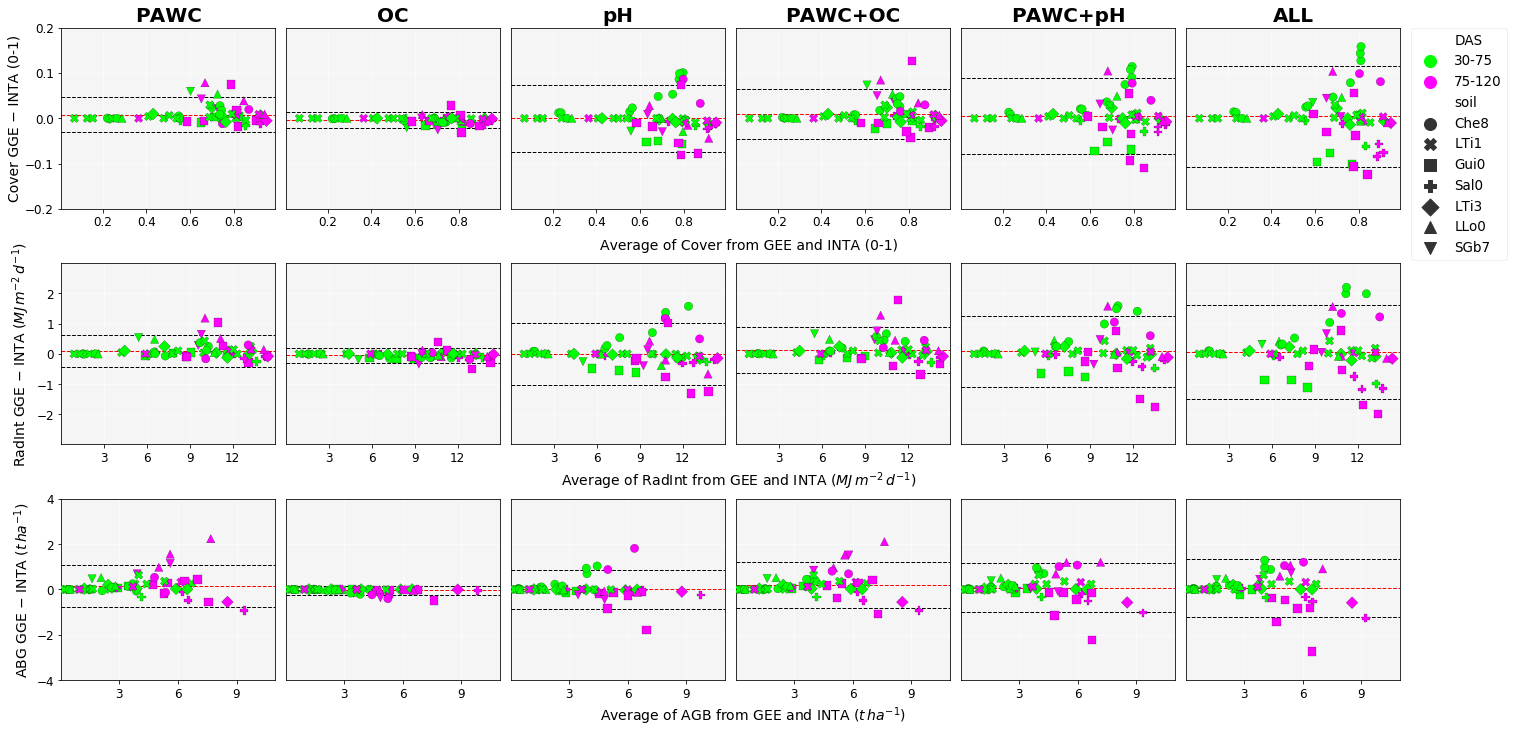

In [11]:
kwargs  =   {'edgecolor':"k"}
fig = plt.figure(figsize=(24,12))

ax=plt.subplot(3, 6, 1)
ax.set_title('PAWC',fontsize= 20,weight='bold') 
xmax=0.99
xmin=0.01
ymax=0.2
ymin=-0.2
plt.plot([xmin,xmax],[Cover_GGEpawcinta_mean,Cover_GGEpawcinta_mean],"--",color="red", linewidth=1,zorder=1)
plt.plot([xmin,xmax],[Cover_GGEpawcinta_meanplus2sd,Cover_GGEpawcinta_meanplus2sd],"--",color="k", linewidth=1,zorder=1)
plt.plot([xmin,xmax],[Cover_GGEpawcinta_meanminus2sd,Cover_GGEpawcinta_meanminus2sd],"--",color="k", linewidth=1,zorder=1)
sns.scatterplot(x="Cover_GGEpawc-inta_mean", y="Cover_GGEpawc-inta",hue='DAS', style='soil', alpha=1,data=df_final,linewidth=0.2,**kwargs,
                s=70,zorder=3, palette = ['lime','magenta'])

# Formatting graph and background
plt.legend(prop=dict(size=13.5),bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=1,framealpha=0.3,markerscale=2)
plt.ylabel('Cover GGE \u2212 INTA (0-1)', fontsize =14)
plt.xlabel('', fontsize =14)
ax = plt.gca()
ax.grid(True, 'major', color='w', linestyle='-', linewidth=0.5)
ax.grid(True, 'minor', color='0.92', linestyle='-', linewidth=0.7)
ax.patch.set_facecolor('0.96')
ax.set_axisbelow(True)
ax.yaxis.set_tick_params(labelsize=12)
ax.xaxis.set_tick_params(labelsize=12)
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.2))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.set_xlim([xmin,xmax])
ax.set_ylim([ymin,ymax])
plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)
plt.tick_params(axis='y',which='both',left=True)
ax.get_legend().remove()

##############################################################################################
ax=plt.subplot(3, 6, 2)
ax.set_title('OC',fontsize= 20,weight='bold') 
xmax=0.99
xmin=0.01
ymax=0.2
ymin=-0.2
plt.plot([xmin,xmax],[Cover_GGEocinta_mean,Cover_GGEocinta_mean],"--",color="red", linewidth=1,zorder=1)
plt.plot([xmin,xmax],[Cover_GGEocinta_meanplus2sd,Cover_GGEocinta_meanplus2sd],"--",color="k", linewidth=1,zorder=1)
plt.plot([xmin,xmax],[Cover_GGEocinta_meanminus2sd,Cover_GGEocinta_meanminus2sd],"--",color="k", linewidth=1,zorder=1)
sns.scatterplot(x="Cover_GGEoc-inta_mean", y="Cover_GGEoc-inta",hue='DAS', style='soil', alpha=1,data=df_final,linewidth=0.2,**kwargs,
                s=70,zorder=3, palette = ['lime','magenta'])

# Formatting graph and background
plt.legend(prop=dict(size=13.5),bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=1,framealpha=0.3,markerscale=2)
plt.ylabel('', fontsize =14)
plt.xlabel('', fontsize =14)
ax = plt.gca()
ax.grid(True, 'major', color='w', linestyle='-', linewidth=0.5)
ax.grid(True, 'minor', color='0.92', linestyle='-', linewidth=0.7)
ax.patch.set_facecolor('0.96')
ax.set_axisbelow(True)
ax.yaxis.set_tick_params(labelsize=12)
ax.xaxis.set_tick_params(labelsize=12)
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.2))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.set_xlim([xmin,xmax])
ax.set_ylim([ymin,ymax])
plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)
plt.tick_params(axis='y',which='both',left=False)
ax.get_legend().remove()
ax.set_yticklabels([])

##############################################################################################
ax=plt.subplot(3, 6, 3)
ax.set_title('pH',fontsize= 20,weight='bold') 
xmax=0.99
xmin=0.01
ymax=0.2
ymin=-0.2
plt.plot([xmin,xmax],[Cover_GGEpHinta_mean,Cover_GGEpHinta_mean],"--",color="red", linewidth=1,zorder=1)
plt.plot([xmin,xmax],[Cover_GGEpHinta_meanplus2sd,Cover_GGEpHinta_meanplus2sd],"--",color="k", linewidth=1,zorder=1)
plt.plot([xmin,xmax],[Cover_GGEpHinta_meanminus2sd,Cover_GGEpHinta_meanminus2sd],"--",color="k", linewidth=1,zorder=1)
sns.scatterplot(x="Cover_GGEpH-inta_mean", y="Cover_GGEpH-inta",hue='DAS', style='soil', alpha=1,data=df_final,linewidth=0.2,**kwargs,
                s=70,zorder=3, palette = ['lime','magenta'])

# Formatting graph and background
plt.legend(prop=dict(size=13.5),bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=1,framealpha=0.3,markerscale=2)
plt.ylabel('', fontsize =14)
plt.xlabel('', fontsize =14)
ax = plt.gca()
ax.grid(True, 'major', color='w', linestyle='-', linewidth=0.5)
ax.grid(True, 'minor', color='0.92', linestyle='-', linewidth=0.7)
ax.patch.set_facecolor('0.96')
ax.set_axisbelow(True)
ax.yaxis.set_tick_params(labelsize=12)
ax.xaxis.set_tick_params(labelsize=12)
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.2))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.set_xlim([xmin,xmax])
ax.set_ylim([ymin,ymax])
plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)
plt.tick_params(axis='y',which='both',left=False)
ax.get_legend().remove()
ax.set_yticklabels([])

##############################################################################################
ax=plt.subplot(3, 6, 4)
ax.set_title('PAWC+OC',fontsize= 20,weight='bold') 
xmax=0.99
xmin=0.01
ymax=0.2
ymin=-0.2
plt.plot([xmin,xmax],[Cover_GGEpawcocinta_mean,Cover_GGEpawcocinta_mean],"--",color="red", linewidth=1,zorder=1)
plt.plot([xmin,xmax],[Cover_GGEpawcocinta_meanplus2sd,Cover_GGEpawcocinta_meanplus2sd],"--",color="k", linewidth=1,zorder=1)
plt.plot([xmin,xmax],[Cover_GGEpawcocinta_meanminus2sd,Cover_GGEpawcocinta_meanminus2sd],"--",color="k", linewidth=1,zorder=1)
sns.scatterplot(x="Cover_GGEpawcoc-inta_mean", y="Cover_GGEpawcoc-inta",hue='DAS', style='soil', alpha=1,data=df_final,linewidth=0.2,**kwargs,
                s=70,zorder=3, palette = ['lime','magenta'])

# Formatting graph and background
plt.legend(prop=dict(size=13.5),bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=1,framealpha=0.3,markerscale=2)
plt.ylabel('', fontsize =14)
plt.xlabel('', fontsize =14)
ax = plt.gca()
ax.grid(True, 'major', color='w', linestyle='-', linewidth=0.5)
ax.grid(True, 'minor', color='0.92', linestyle='-', linewidth=0.7)
ax.patch.set_facecolor('0.96')
ax.set_axisbelow(True)
ax.yaxis.set_tick_params(labelsize=12)
ax.xaxis.set_tick_params(labelsize=12)
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.2))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.set_xlim([xmin,xmax])
ax.set_ylim([ymin,ymax])
plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)
plt.tick_params(axis='y',which='both',left=False)
ax.get_legend().remove()
ax.set_yticklabels([])

##############################################################################################
ax=plt.subplot(3, 6, 5)
ax.set_title('PAWC+pH',fontsize= 20,weight='bold') 
xmax=0.99
xmin=0.01
ymax=0.2
ymin=-0.2
plt.plot([xmin,xmax],[Cover_GGEpawcpHinta_mean,Cover_GGEpawcpHinta_mean],"--",color="red", linewidth=1,zorder=1)
plt.plot([xmin,xmax],[Cover_GGEpawcpHinta_meanplus2sd,Cover_GGEpawcpHinta_meanplus2sd],"--",color="k", linewidth=1,zorder=1)
plt.plot([xmin,xmax],[Cover_GGEpawcpHinta_meanminus2sd,Cover_GGEpawcpHinta_meanminus2sd],"--",color="k", linewidth=1,zorder=1)
sns.scatterplot(x="Cover_GGEpawcpH-inta_mean", y="Cover_GGEpawcpH-inta",hue='DAS', style='soil', alpha=1,data=df_final,linewidth=0.2,**kwargs,
                s=70,zorder=3, palette = ['lime','magenta'])

# Formatting graph and background
plt.legend(prop=dict(size=13.5),bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=1,framealpha=0.3,markerscale=2)
plt.ylabel('', fontsize =14)
plt.xlabel('', fontsize =14)
ax = plt.gca()
ax.grid(True, 'major', color='w', linestyle='-', linewidth=0.5)
ax.grid(True, 'minor', color='0.92', linestyle='-', linewidth=0.7)
ax.patch.set_facecolor('0.96')
ax.set_axisbelow(True)
ax.yaxis.set_tick_params(labelsize=12)
ax.xaxis.set_tick_params(labelsize=12)
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.2))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.set_xlim([xmin,xmax])
ax.set_ylim([ymin,ymax])
plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)
plt.tick_params(axis='y',which='both',left=False)
ax.get_legend().remove()
ax.set_yticklabels([])

##############################################################################################
ax=plt.subplot(3, 6, 6)
ax.set_title('ALL',fontsize= 20,weight='bold') 
xmax=0.99
xmin=0.01
ymax=0.2
ymin=-0.2
plt.plot([xmin,xmax],[Cover_GGEallinta_mean,Cover_GGEallinta_mean],"--",color="red", linewidth=1,zorder=1)
plt.plot([xmin,xmax],[Cover_GGEallinta_meanplus2sd,Cover_GGEallinta_meanplus2sd],"--",color="k", linewidth=1,zorder=1)
plt.plot([xmin,xmax],[Cover_GGEallinta_meanminus2sd,Cover_GGEallinta_meanminus2sd],"--",color="k", linewidth=1,zorder=1)
sns.scatterplot(x="Cover_GGEall-inta_mean", y="Cover_GGEall-inta",hue='DAS', style='soil', alpha=1,data=df_final,linewidth=0.2,**kwargs,
                s=70,zorder=3, palette = ['lime','magenta'])

# Formatting graph and background
plt.legend(prop=dict(size=13.5),bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=1,framealpha=0.3,markerscale=2)
plt.ylabel('', fontsize =14)
plt.xlabel('', fontsize =14)
ax = plt.gca()
ax.grid(True, 'major', color='w', linestyle='-', linewidth=0.5)
ax.grid(True, 'minor', color='0.92', linestyle='-', linewidth=0.7)
ax.patch.set_facecolor('0.96')
ax.set_axisbelow(True)
ax.yaxis.set_tick_params(labelsize=12)
ax.xaxis.set_tick_params(labelsize=12)
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.2))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.set_xlim([xmin,xmax])
ax.set_ylim([ymin,ymax])
plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)
plt.tick_params(axis='y',which='both',left=False)
#ax.get_legend().remove()
ax.set_yticklabels([])

############################################################################
ax=plt.subplot(3, 6, 7)
#ax.set_title('PAWC',fontsize= 20,weight='bold') 
xmax=14.99
xmin=0.01
ymax=2.99
ymin=-2.99
plt.plot([xmin,xmax],[RadInt_GGEpawcinta_mean,RadInt_GGEpawcinta_mean],"--",color="red", linewidth=1,zorder=1)
plt.plot([xmin,xmax],[RadInt_GGEpawcinta_meanplus2sd,RadInt_GGEpawcinta_meanplus2sd],"--",color="k", linewidth=1,zorder=1)
plt.plot([xmin,xmax],[RadInt_GGEpawcinta_meanminus2sd,RadInt_GGEpawcinta_meanminus2sd],"--",color="k", linewidth=1,zorder=1)
sns.scatterplot(x="RadInt_GGEpawc-inta_mean", y="RadInt_GGEpawc-inta",hue='DAS', style='soil', alpha=1,data=df_final,linewidth=0.2,**kwargs,
                s=70,zorder=3, palette = ['lime','magenta'])

# Formatting graph and background
plt.legend(prop=dict(size=13.5),bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=1,framealpha=0.3,markerscale=2)
plt.ylabel('RadInt GGE \u2212 INTA ($MJ\,m^{-2}\,d^{-1}$)', fontsize =14)
plt.xlabel('', fontsize =14)
ax = plt.gca()
ax.grid(True, 'major', color='w', linestyle='-', linewidth=0.5)
ax.grid(True, 'minor', color='0.92', linestyle='-', linewidth=0.7)
ax.patch.set_facecolor('0.96')
ax.set_axisbelow(True)
ax.yaxis.set_tick_params(labelsize=12)
ax.xaxis.set_tick_params(labelsize=12)
ax.xaxis.set_major_locator(ticker.MultipleLocator(3))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.set_xlim([xmin,xmax])
ax.set_ylim([ymin,ymax])
plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)
plt.tick_params(axis='y',which='both',left=True)
ax.get_legend().remove()

##############################################################################################
ax=plt.subplot(3, 6, 8)
#ax.set_title('OC',fontsize= 20,weight='bold') 
xmax=14.99
xmin=0.01
ymax=2.99
ymin=-2.99
plt.plot([xmin,xmax],[RadInt_GGEocinta_mean,RadInt_GGEocinta_mean],"--",color="red", linewidth=1,zorder=1)
plt.plot([xmin,xmax],[RadInt_GGEocinta_meanplus2sd,RadInt_GGEocinta_meanplus2sd],"--",color="k", linewidth=1,zorder=1)
plt.plot([xmin,xmax],[RadInt_GGEocinta_meanminus2sd,RadInt_GGEocinta_meanminus2sd],"--",color="k", linewidth=1,zorder=1)
sns.scatterplot(x="RadInt_GGEoc-inta_mean", y="RadInt_GGEoc-inta",hue='DAS', style='soil', alpha=1,data=df_final,linewidth=0.2,**kwargs,
                s=70,zorder=3, palette = ['lime','magenta'])

# Formatting graph and background
plt.legend(prop=dict(size=13.5),bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=1,framealpha=0.3,markerscale=2)
plt.ylabel('', fontsize =14)
plt.xlabel('', fontsize =14)
ax = plt.gca()
ax.grid(True, 'major', color='w', linestyle='-', linewidth=0.5)
ax.grid(True, 'minor', color='0.92', linestyle='-', linewidth=0.7)
ax.patch.set_facecolor('0.96')
ax.set_axisbelow(True)
ax.yaxis.set_tick_params(labelsize=12)
ax.xaxis.set_tick_params(labelsize=12)
ax.xaxis.set_major_locator(ticker.MultipleLocator(3))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.set_xlim([xmin,xmax])
ax.set_ylim([ymin,ymax])
plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)
plt.tick_params(axis='y',which='both',left=False)
ax.get_legend().remove()
ax.set_yticklabels([])

##############################################################################################
ax=plt.subplot(3, 6, 9)
#ax.set_title('pH',fontsize= 20,weight='bold') 
xmax=14.99
xmin=0.01
ymax=2.99
ymin=-2.99
plt.plot([xmin,xmax],[RadInt_GGEpHinta_mean,RadInt_GGEpHinta_mean],"--",color="red", linewidth=1,zorder=1)
plt.plot([xmin,xmax],[RadInt_GGEpHinta_meanplus2sd,RadInt_GGEpHinta_meanplus2sd],"--",color="k", linewidth=1,zorder=1)
plt.plot([xmin,xmax],[RadInt_GGEpHinta_meanminus2sd,RadInt_GGEpHinta_meanminus2sd],"--",color="k", linewidth=1,zorder=1)
sns.scatterplot(x="RadInt_GGEpH-inta_mean", y="RadInt_GGEpH-inta",hue='DAS', style='soil', alpha=1,data=df_final,linewidth=0.2,**kwargs,
                s=70,zorder=3, palette = ['lime','magenta'])

# Formatting graph and background
plt.legend(prop=dict(size=13.5),bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=1,framealpha=0.3,markerscale=2)
plt.ylabel('', fontsize =14)
plt.xlabel('', fontsize =14)
ax = plt.gca()
ax.grid(True, 'major', color='w', linestyle='-', linewidth=0.5)
ax.grid(True, 'minor', color='0.92', linestyle='-', linewidth=0.7)
ax.patch.set_facecolor('0.96')
ax.set_axisbelow(True)
ax.yaxis.set_tick_params(labelsize=12)
ax.xaxis.set_tick_params(labelsize=12)
ax.xaxis.set_major_locator(ticker.MultipleLocator(3))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.set_xlim([xmin,xmax])
ax.set_ylim([ymin,ymax])
plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)
plt.tick_params(axis='y',which='both',left=False)
ax.get_legend().remove()
ax.set_yticklabels([])

##############################################################################################
ax=plt.subplot(3, 6, 10)
#ax.set_title('PAWC+OC',fontsize= 20,weight='bold') 
xmax=14.99
xmin=0.01
ymax=2.99
ymin=-2.99
plt.plot([xmin,xmax],[RadInt_GGEpawcocinta_mean,RadInt_GGEpawcocinta_mean],"--",color="red", linewidth=1,zorder=1)
plt.plot([xmin,xmax],[RadInt_GGEpawcocinta_meanplus2sd,RadInt_GGEpawcocinta_meanplus2sd],"--",color="k", linewidth=1,zorder=1)
plt.plot([xmin,xmax],[RadInt_GGEpawcocinta_meanminus2sd,RadInt_GGEpawcocinta_meanminus2sd],"--",color="k", linewidth=1,zorder=1)
sns.scatterplot(x="RadInt_GGEpawcoc-inta_mean", y="RadInt_GGEpawcoc-inta",hue='DAS', style='soil', alpha=1,data=df_final,linewidth=0.2,**kwargs,
                s=70,zorder=3, palette = ['lime','magenta'])

# Formatting graph and background
plt.legend(prop=dict(size=13.5),bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=1,framealpha=0.3,markerscale=2)
plt.ylabel('', fontsize =14)
plt.xlabel('', fontsize =14)
ax = plt.gca()
ax.grid(True, 'major', color='w', linestyle='-', linewidth=0.5)
ax.grid(True, 'minor', color='0.92', linestyle='-', linewidth=0.7)
ax.patch.set_facecolor('0.96')
ax.set_axisbelow(True)
ax.yaxis.set_tick_params(labelsize=12)
ax.xaxis.set_tick_params(labelsize=12)
ax.xaxis.set_major_locator(ticker.MultipleLocator(3))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.set_xlim([xmin,xmax])
ax.set_ylim([ymin,ymax])
plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)
plt.tick_params(axis='y',which='both',left=False)
ax.get_legend().remove()
ax.set_yticklabels([])

##############################################################################################
ax=plt.subplot(3, 6, 11)
#ax.set_title('PAWC+pH',fontsize= 20,weight='bold') 
xmax=14.99
xmin=0.01
ymax=2.99
ymin=-2.99
plt.plot([xmin,xmax],[RadInt_GGEpawcpHinta_mean,RadInt_GGEpawcpHinta_mean],"--",color="red", linewidth=1,zorder=1)
plt.plot([xmin,xmax],[RadInt_GGEpawcpHinta_meanplus2sd,RadInt_GGEpawcpHinta_meanplus2sd],"--",color="k", linewidth=1,zorder=1)
plt.plot([xmin,xmax],[RadInt_GGEpawcpHinta_meanminus2sd,RadInt_GGEpawcpHinta_meanminus2sd],"--",color="k", linewidth=1,zorder=1)
sns.scatterplot(x="RadInt_GGEpawcpH-inta_mean", y="RadInt_GGEpawcpH-inta",hue='DAS', style='soil', alpha=1,data=df_final,linewidth=0.2,**kwargs,
                s=70,zorder=3, palette = ['lime','magenta'])

# Formatting graph and background
plt.legend(prop=dict(size=13.5),bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=1,framealpha=0.3,markerscale=2)
plt.ylabel('', fontsize =14)
plt.xlabel('', fontsize =14)
ax = plt.gca()
ax.grid(True, 'major', color='w', linestyle='-', linewidth=0.5)
ax.grid(True, 'minor', color='0.92', linestyle='-', linewidth=0.7)
ax.patch.set_facecolor('0.96')
ax.set_axisbelow(True)
ax.yaxis.set_tick_params(labelsize=12)
ax.xaxis.set_tick_params(labelsize=12)
ax.xaxis.set_major_locator(ticker.MultipleLocator(3))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.set_xlim([xmin,xmax])
ax.set_ylim([ymin,ymax])
plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)
plt.tick_params(axis='y',which='both',left=False)
ax.get_legend().remove()
ax.set_yticklabels([])

##############################################################################################
ax=plt.subplot(3, 6, 12)
#ax.set_title('ALL',fontsize= 20,weight='bold') 
xmax=14.99
xmin=0.01
ymax=2.99
ymin=-2.99
plt.plot([xmin,xmax],[RadInt_GGEallinta_mean,RadInt_GGEallinta_mean],"--",color="red", linewidth=1,zorder=1)
plt.plot([xmin,xmax],[RadInt_GGEallinta_meanplus2sd,RadInt_GGEallinta_meanplus2sd],"--",color="k", linewidth=1,zorder=1)
plt.plot([xmin,xmax],[RadInt_GGEallinta_meanminus2sd,RadInt_GGEallinta_meanminus2sd],"--",color="k", linewidth=1,zorder=1)
sns.scatterplot(x="RadInt_GGEall-inta_mean", y="RadInt_GGEall-inta",hue='DAS', style='soil', alpha=1,data=df_final,linewidth=0.2,**kwargs,
                s=70,zorder=3, palette = ['lime','magenta'])

# Formatting graph and background
plt.legend(prop=dict(size=13.5),bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=1,framealpha=0.3,markerscale=2)
plt.ylabel('', fontsize =14)
plt.xlabel('', fontsize =14)
ax = plt.gca()
ax.grid(True, 'major', color='w', linestyle='-', linewidth=0.5)
ax.grid(True, 'minor', color='0.92', linestyle='-', linewidth=0.7)
ax.patch.set_facecolor('0.96')
ax.set_axisbelow(True)
ax.yaxis.set_tick_params(labelsize=12)
ax.xaxis.set_tick_params(labelsize=12)
ax.xaxis.set_major_locator(ticker.MultipleLocator(3))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.set_xlim([xmin,xmax])
ax.set_ylim([ymin,ymax])
plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)
plt.tick_params(axis='y',which='both',left=False)
ax.get_legend().remove()
ax.set_yticklabels([])

######################################################################
ax=plt.subplot(3, 6, 13)
#ax.set_title('PAWC',fontsize= 20,weight='bold') 
xmax=10.99
xmin=0.01
ymax=4
ymin=-4
plt.plot([xmin,xmax],[AGB_GGEpawcinta_mean,AGB_GGEpawcinta_mean],"--",color="red", linewidth=1,zorder=1)
plt.plot([xmin,xmax],[AGB_GGEpawcinta_meanplus2sd,AGB_GGEpawcinta_meanplus2sd],"--",color="k", linewidth=1,zorder=1)
plt.plot([xmin,xmax],[AGB_GGEpawcinta_meanminus2sd,AGB_GGEpawcinta_meanminus2sd],"--",color="k", linewidth=1,zorder=1)
sns.scatterplot(x="AGB_GGEpawc-inta_mean", y="AGB_GGEpawc-inta",hue='DAS', style='soil', alpha=1,data=df_final,linewidth=0.2,**kwargs,
                s=70,zorder=3, palette = ['lime','magenta'])

# Formatting graph and background
plt.legend(prop=dict(size=13.5),bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=1,framealpha=0.3,markerscale=2)
plt.ylabel('ABG GGE \u2212 INTA ($t\,ha^{-1}$)', fontsize =14)
plt.xlabel('', fontsize =14)
ax = plt.gca()
ax.grid(True, 'major', color='w', linestyle='-', linewidth=0.5)
ax.grid(True, 'minor', color='0.92', linestyle='-', linewidth=0.7)
ax.patch.set_facecolor('0.96')
ax.set_axisbelow(True)
ax.yaxis.set_tick_params(labelsize=12)
ax.xaxis.set_tick_params(labelsize=12)
ax.xaxis.set_major_locator(ticker.MultipleLocator(3))
ax.yaxis.set_major_locator(ticker.MultipleLocator(2))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.set_xlim([xmin,xmax])
ax.set_ylim([ymin,ymax])
plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)
plt.tick_params(axis='y',which='both',left=True)
ax.get_legend().remove()

##############################################################################################
ax=plt.subplot(3, 6, 14)
#ax.set_title('OC',fontsize= 20,weight='bold') 
xmax=10.99
xmin=0.01
ymax=4
ymin=-4
plt.plot([xmin,xmax],[AGB_GGEocinta_mean,AGB_GGEocinta_mean],"--",color="red", linewidth=1,zorder=1)
plt.plot([xmin,xmax],[AGB_GGEocinta_meanplus2sd,AGB_GGEocinta_meanplus2sd],"--",color="k", linewidth=1,zorder=1)
plt.plot([xmin,xmax],[AGB_GGEocinta_meanminus2sd,AGB_GGEocinta_meanminus2sd],"--",color="k", linewidth=1,zorder=1)
sns.scatterplot(x="AGB_GGEoc-inta_mean", y="AGB_GGEoc-inta",hue='DAS', style='soil', alpha=1,data=df_final,linewidth=0.2,**kwargs,
                s=70,zorder=3, palette = ['lime','magenta'])

# Formatting graph and background
plt.legend(prop=dict(size=13.5),bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=1,framealpha=0.3,markerscale=2)
plt.ylabel('', fontsize =14)
plt.xlabel('', fontsize =14)
ax = plt.gca()
ax.grid(True, 'major', color='w', linestyle='-', linewidth=0.5)
ax.grid(True, 'minor', color='0.92', linestyle='-', linewidth=0.7)
ax.patch.set_facecolor('0.96')
ax.set_axisbelow(True)
ax.yaxis.set_tick_params(labelsize=12)
ax.xaxis.set_tick_params(labelsize=12)
ax.xaxis.set_major_locator(ticker.MultipleLocator(3))
ax.yaxis.set_major_locator(ticker.MultipleLocator(2))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.set_xlim([xmin,xmax])
ax.set_ylim([ymin,ymax])
plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)
plt.tick_params(axis='y',which='both',left=False)
ax.get_legend().remove()
ax.set_yticklabels([])

##############################################################################################
ax=plt.subplot(3, 6, 15)
#ax.set_title('pH',fontsize= 20,weight='bold') 
xmax=10.99
xmin=0.01
ymax=4
ymin=-4
plt.plot([xmin,xmax],[AGB_GGEpHinta_mean,AGB_GGEpHinta_mean],"--",color="red", linewidth=1,zorder=1)
plt.plot([xmin,xmax],[AGB_GGEpHinta_meanplus2sd,AGB_GGEpHinta_meanplus2sd],"--",color="k", linewidth=1,zorder=1)
plt.plot([xmin,xmax],[AGB_GGEpHinta_meanminus2sd,AGB_GGEpHinta_meanminus2sd],"--",color="k", linewidth=1,zorder=1)
sns.scatterplot(x="AGB_GGEpH-inta_mean", y="AGB_GGEpH-inta",hue='DAS', style='soil', alpha=1,data=df_final,linewidth=0.2,**kwargs,
                s=70,zorder=3, palette = ['lime','magenta'])

# Formatting graph and background
plt.legend(prop=dict(size=13.5),bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=1,framealpha=0.3,markerscale=2)
plt.ylabel('', fontsize =14)
plt.xlabel('', fontsize =14)
ax = plt.gca()
ax.grid(True, 'major', color='w', linestyle='-', linewidth=0.5)
ax.grid(True, 'minor', color='0.92', linestyle='-', linewidth=0.7)
ax.patch.set_facecolor('0.96')
ax.set_axisbelow(True)
ax.yaxis.set_tick_params(labelsize=12)
ax.xaxis.set_tick_params(labelsize=12)
ax.xaxis.set_major_locator(ticker.MultipleLocator(3))
ax.yaxis.set_major_locator(ticker.MultipleLocator(2))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.set_xlim([xmin,xmax])
ax.set_ylim([ymin,ymax])
plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)
plt.tick_params(axis='y',which='both',left=False)
ax.get_legend().remove()
ax.set_yticklabels([])

##############################################################################################
ax=plt.subplot(3, 6, 16)
#ax.set_title('PAWC+OC',fontsize= 20,weight='bold') 
xmax=10.99
xmin=0.01
ymax=4
ymin=-4
plt.plot([xmin,xmax],[AGB_GGEpawcocinta_mean,AGB_GGEpawcocinta_mean],"--",color="red", linewidth=1,zorder=1)
plt.plot([xmin,xmax],[AGB_GGEpawcocinta_meanplus2sd,AGB_GGEpawcocinta_meanplus2sd],"--",color="k", linewidth=1,zorder=1)
plt.plot([xmin,xmax],[AGB_GGEpawcocinta_meanminus2sd,AGB_GGEpawcocinta_meanminus2sd],"--",color="k", linewidth=1,zorder=1)
sns.scatterplot(x="AGB_GGEpawcoc-inta_mean", y="AGB_GGEpawcoc-inta",hue='DAS', style='soil', alpha=1,data=df_final,linewidth=0.2,**kwargs,
                s=70,zorder=3, palette = ['lime','magenta'])

# Formatting graph and background
plt.legend(prop=dict(size=13.5),bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=1,framealpha=0.3,markerscale=2)
plt.ylabel('', fontsize =14)
plt.xlabel('', fontsize =14)
ax = plt.gca()
ax.grid(True, 'major', color='w', linestyle='-', linewidth=0.5)
ax.grid(True, 'minor', color='0.92', linestyle='-', linewidth=0.7)
ax.patch.set_facecolor('0.96')
ax.set_axisbelow(True)
ax.yaxis.set_tick_params(labelsize=12)
ax.xaxis.set_tick_params(labelsize=12)
ax.xaxis.set_major_locator(ticker.MultipleLocator(3))
ax.yaxis.set_major_locator(ticker.MultipleLocator(2))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.set_xlim([xmin,xmax])
ax.set_ylim([ymin,ymax])
plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)
plt.tick_params(axis='y',which='both',left=False)
ax.get_legend().remove()
ax.set_yticklabels([])

##############################################################################################
ax=plt.subplot(3, 6, 17)
#ax.set_title('PAWC+pH',fontsize= 20,weight='bold') 
xmax=10.99
xmin=0.01
ymax=4
ymin=-4
plt.plot([xmin,xmax],[AGB_GGEpawcpHinta_mean,AGB_GGEpawcpHinta_mean],"--",color="red", linewidth=1,zorder=1)
plt.plot([xmin,xmax],[AGB_GGEpawcpHinta_meanplus2sd,AGB_GGEpawcpHinta_meanplus2sd],"--",color="k", linewidth=1,zorder=1)
plt.plot([xmin,xmax],[AGB_GGEpawcpHinta_meanminus2sd,AGB_GGEpawcpHinta_meanminus2sd],"--",color="k", linewidth=1,zorder=1)
sns.scatterplot(x="AGB_GGEpawcpH-inta_mean", y="AGB_GGEpawcpH-inta",hue='DAS', style='soil', alpha=1,data=df_final,linewidth=0.2,**kwargs,
                s=70,zorder=3, palette = ['lime','magenta'])

# Formatting graph and background
plt.legend(prop=dict(size=13.5),bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=1,framealpha=0.3,markerscale=2)
plt.ylabel('', fontsize =14)
plt.xlabel('', fontsize =14)
ax = plt.gca()
ax.grid(True, 'major', color='w', linestyle='-', linewidth=0.5)
ax.grid(True, 'minor', color='0.92', linestyle='-', linewidth=0.7)
ax.patch.set_facecolor('0.96')
ax.set_axisbelow(True)
ax.yaxis.set_tick_params(labelsize=12)
ax.xaxis.set_tick_params(labelsize=12)
ax.xaxis.set_major_locator(ticker.MultipleLocator(3))
ax.yaxis.set_major_locator(ticker.MultipleLocator(2))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.set_xlim([xmin,xmax])
ax.set_ylim([ymin,ymax])
plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)
plt.tick_params(axis='y',which='both',left=False)
ax.get_legend().remove()
ax.set_yticklabels([])

##############################################################################################
ax=plt.subplot(3, 6, 18)
#ax.set_title('ALL',fontsize= 20,weight='bold') 
xmax=10.99
xmin=0.01
ymax=4
ymin=-4
plt.plot([xmin,xmax],[AGB_GGEallinta_mean,AGB_GGEallinta_mean],"--",color="red", linewidth=1,zorder=1)
plt.plot([xmin,xmax],[AGB_GGEallinta_meanplus2sd,AGB_GGEallinta_meanplus2sd],"--",color="k", linewidth=1,zorder=1)
plt.plot([xmin,xmax],[AGB_GGEallinta_meanminus2sd,AGB_GGEallinta_meanminus2sd],"--",color="k", linewidth=1,zorder=1)
sns.scatterplot(x="AGB_GGEall-inta_mean", y="AGB_GGEall-inta",hue='DAS', style='soil', alpha=1,data=df_final,linewidth=0.2,**kwargs,
                s=70,zorder=3, palette = ['lime','magenta'])

# Formatting graph and background
plt.legend(prop=dict(size=13.5),bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=1,framealpha=0.3,markerscale=2)
plt.ylabel('', fontsize =14)
plt.xlabel('', fontsize =14)
ax = plt.gca()
ax.grid(True, 'major', color='w', linestyle='-', linewidth=0.5)
ax.grid(True, 'minor', color='0.92', linestyle='-', linewidth=0.7)
ax.patch.set_facecolor('0.96')
ax.set_axisbelow(True)
ax.yaxis.set_tick_params(labelsize=12)
ax.xaxis.set_tick_params(labelsize=12)
ax.xaxis.set_major_locator(ticker.MultipleLocator(3))
ax.yaxis.set_major_locator(ticker.MultipleLocator(2))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.set_xlim([xmin,xmax])
ax.set_ylim([ymin,ymax])
plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)
plt.tick_params(axis='y',which='both',left=False)
ax.get_legend().remove()
ax.set_yticklabels([])

####################################################################
plt.text(-30, 15,'Average of Cover from GEE and INTA (0-1)',fontsize=14,color='k')
plt.text(-32, 4.6,'Average of RadInt from GEE and INTA ($MJ\,m^{-2}\,d^{-1}$)',fontsize=14,color='k')
plt.text(-30, -5.8,'Average of AGB from GEE and INTA ($t\,ha^{-1}$)',fontsize=14,color='k')
####################################################################
plt.subplots_adjust(wspace=0.05, hspace=0.3)
#plt.savefig(r'C:\Users\jjojeda\Google Drive\COALAR\Sorgo\Python\ResidualsGEE.png', dpi=300,bbox_inches='tight')

In [12]:
Cover_GGEpawcinta_meanplus2sd

Cover_GGEpawc-inta    0.048012
dtype: float64

In [13]:
RadInt_GGEpawcinta_meanplus2sd

RadInt_GGEpawc-inta    0.636402
dtype: float64

In [14]:
AGB_GGEpawcinta_meanplus2sd

AGB_GGEpawc-inta    1.093641
dtype: float64

In [15]:
AGB_GGEallinta_meanminus2sd

AGB_GGEall-inta   -1.218592
dtype: float64

In [16]:
AGB_GGEallinta_meanplus2sd

AGB_GGEall-inta    1.336579
dtype: float64

In [17]:
df_final.loc[(df_final['Cover_GGEpawc-inta'] > 0.078499)]

,Experiment,Clock.Today,AGB_INTA,Das,Cover_INTA,RadInt_INTA,AGB_GEEpH,Cover_GEEpH,RadInt_GEEpH,AGB_GEEoc,...,RadInt_GGEpawc-inta,RadInt_GGEpawcoc-inta,RadInt_GGEpawcpH-inta,RadInt_GGEall-inta,RadInt_GGEpH-inta_mean,RadInt_GGEoc-inta_mean,RadInt_GGEpawc-inta_mean,RadInt_GGEpawcoc-inta_mean,RadInt_GGEpawcpH-inta_mean,RadInt_GGEall-inta_mean
16,459100_LLo0_lid_19_O,2019-02-01 12:00:00,6.55899,102,0.629177,9.481695,6.429956,0.657225,9.90438,6.515282,...,1.183754,1.274983,1.575929,1.562511,9.693038,9.543719,10.073572,10.119186,10.26966,10.26295


In [18]:
df_final.loc[(df_final['RadInt_GGEpawc-inta'] > 0.679118)]

,Experiment,Clock.Today,AGB_INTA,Das,Cover_INTA,RadInt_INTA,AGB_GEEpH,Cover_GEEpH,RadInt_GEEpH,AGB_GEEoc,...,RadInt_GGEpawc-inta,RadInt_GGEpawcoc-inta,RadInt_GGEpawcpH-inta,RadInt_GGEall-inta,RadInt_GGEpH-inta_mean,RadInt_GGEoc-inta_mean,RadInt_GGEpawc-inta_mean,RadInt_GGEpawcoc-inta_mean,RadInt_GGEpawcpH-inta_mean,RadInt_GGEall-inta_mean
15,459100_Gui0_ibe_20_F,2020-02-01 12:00:00,6.782931,101,0.751071,10.454912,6.655497,0.824437,11.476158,6.763968,...,1.037454,1.769950,0.764436,0.772972,10.965535,10.651399,10.973639,11.339887,10.83713,10.841398
16,459100_LLo0_lid_19_O,2019-02-01 12:00:00,6.558990,102,0.629177,9.481695,6.429956,0.657225,9.904380,6.515282,...,1.183754,1.274983,1.575929,1.562511,9.693038,9.543719,10.073572,10.119186,10.26966,10.262950


In [19]:
df_final.loc[(df_final['AGB_GGEpawc-inta'] > 1.743638)]

,Experiment,Clock.Today,AGB_INTA,Das,Cover_INTA,RadInt_INTA,AGB_GEEpH,Cover_GEEpH,RadInt_GEEpH,AGB_GEEoc,...,RadInt_GGEpawc-inta,RadInt_GGEpawcoc-inta,RadInt_GGEpawcpH-inta,RadInt_GGEall-inta,RadInt_GGEpH-inta_mean,RadInt_GGEoc-inta_mean,RadInt_GGEpawc-inta_mean,RadInt_GGEpawcoc-inta_mean,RadInt_GGEpawcpH-inta_mean,RadInt_GGEall-inta_mean
16,459100_LLo0_lid_19_O,2019-02-01 12:00:00,6.55899,102,0.629177,9.481695,6.429956,0.657225,9.90438,6.515282,...,1.183754,1.274983,1.575929,1.562511,9.693038,9.543719,10.073572,10.119186,10.26966,10.26295


In [20]:
df_final.loc[(df_final['AGB_GGEall-inta'] < -1.327496)]

,Experiment,Clock.Today,AGB_INTA,Das,Cover_INTA,RadInt_INTA,AGB_GEEpH,Cover_GEEpH,RadInt_GEEpH,AGB_GEEoc,...,RadInt_GGEpawc-inta,RadInt_GGEpawcoc-inta,RadInt_GGEpawcpH-inta,RadInt_GGEall-inta,RadInt_GGEpH-inta_mean,RadInt_GGEoc-inta_mean,RadInt_GGEpawc-inta_mean,RadInt_GGEpawcoc-inta_mean,RadInt_GGEpawcpH-inta_mean,RadInt_GGEall-inta_mean
8,431086_Gui0_adv_19_F,2019-01-15 12:00:00,5.368827,86,0.666888,8.802923,4.528694,0.648584,8.561302,5.169128,...,-0.082699,-0.141135,-0.250817,-0.393607,8.682113,8.760163,8.761574,8.732356,8.677515,8.606120
8,431086_Gui0_adv_19_F,2019-02-01 12:00:00,7.842464,103,0.588389,8.867027,6.046366,0.578549,8.718730,7.353757,...,-0.110964,-0.165670,0.061325,0.142094,8.792878,8.814301,8.811545,8.784192,8.897690,8.938074


In [21]:
df_final.loc[(df_final['AGB_GGEall-inta'] > 1.568688)]

,Experiment,Clock.Today,AGB_INTA,Das,Cover_INTA,RadInt_INTA,AGB_GEEpH,Cover_GEEpH,RadInt_GEEpH,AGB_GEEoc,...,RadInt_GGEpawc-inta,RadInt_GGEpawcoc-inta,RadInt_GGEpawcpH-inta,RadInt_GGEall-inta,RadInt_GGEpH-inta_mean,RadInt_GGEoc-inta_mean,RadInt_GGEpawc-inta_mean,RadInt_GGEpawcoc-inta_mean,RadInt_GGEpawcpH-inta_mean,RadInt_GGEall-inta_mean


In [22]:
#df_final.to_csv(r'C:\Users\jjojeda\Google Drive\COALAR\Sorgo\Python\df.csv', index=None, mode='a')

In [23]:
df_final.describe()

,AGB_INTA,Das,Cover_INTA,RadInt_INTA,AGB_GEEpH,Cover_GEEpH,RadInt_GEEpH,AGB_GEEoc,Cover_GEEoc,RadInt_GEEoc,...,RadInt_GGEpawc-inta,RadInt_GGEpawcoc-inta,RadInt_GGEpawcpH-inta,RadInt_GGEall-inta,RadInt_GGEpH-inta_mean,RadInt_GGEoc-inta_mean,RadInt_GGEpawc-inta_mean,RadInt_GGEpawcoc-inta_mean,RadInt_GGEpawcpH-inta_mean,RadInt_GGEall-inta_mean
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,...,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,3.533644,69.700000,0.655701,8.870965,3.547402,0.655284,8.866748,3.486708,0.651732,8.819381,...,0.107185,0.131029,0.080332,0.063947,8.868857,8.845173,8.924557,8.936480,8.911131,8.902938
std,2.339684,20.835351,0.227177,3.853441,2.299111,0.224795,3.824401,2.307642,0.225379,3.828965,...,0.264609,0.374388,0.588497,0.777809,3.830322,3.840778,3.858709,3.856941,3.840024,3.824773
min,0.163964,30.000000,0.071004,0.911689,0.163888,0.071004,0.911689,0.163955,0.071004,0.911689,...,-0.282688,-0.678644,-1.743685,-1.978091,0.911689,0.911689,0.911689,0.911689,0.911689,0.911689
25%,1.507911,55.000000,0.551358,6.273208,1.579348,0.554562,6.269055,1.496036,0.546868,6.272749,...,-0.020850,-0.039927,-0.093067,-0.116987,6.271132,6.272979,6.426461,6.438496,6.435476,6.425869
50%,3.557985,70.000000,0.719754,9.517434,3.624312,0.716250,9.866191,3.403610,0.706385,9.555951,...,0.034999,0.039147,0.000000,0.000000,9.760513,9.522151,9.890876,9.918495,9.995622,10.000444
75%,5.177403,85.250000,0.810698,11.812289,5.137265,0.822354,11.844834,5.049505,0.807736,11.807973,...,0.141225,0.212097,0.201151,0.245923,11.946189,11.810131,11.872900,11.892377,12.027472,11.841753
max,9.855370,120.000000,0.952000,14.513238,9.611715,0.942602,14.369975,9.807839,0.951031,14.498467,...,1.183754,1.769950,1.584429,2.194218,14.441606,14.505852,14.473472,14.472571,14.455933,14.434728
